In [1]:
!git clone https://github.com/liuzey/CheckGPT-v2.git

Cloning into 'CheckGPT-v2'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 145 (delta 14), reused 29 (delta 9), pack-reused 107 (from 1)
Receiving objects: 100% (145/145), 1.10 GiB | 17.35 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Updating files: 100% (68/68), done.


In [ ]:
!pip install datasets

## Getting AI and Human Generated text from our dataset



In [145]:
import json
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Load AI-generated texts
with open('CheckGPT-v2/GPABenchmark/CS_TASK1/gpt.json', 'r') as f:
    gpt_data = json.load(f)
ai_texts = list(gpt_data.values())  # <-- fixed here

# Load Human-written texts
with open('CheckGPT-v2/GPABenchmark/CS_TASK1/hum.json', 'r') as f:
    hum_data = json.load(f)
hum_texts = list(hum_data.values())  # <-- fixed here

In [146]:
hum_texts = hum_texts[:150]
ai_texts = ai_texts[400:600]

In [147]:
print(len(ai_texts))
print(len(hum_texts))

200
150


## Loading QWEN as a Paraphraser for Testing

In [151]:
import csv
from tqdm import tqdm
import gc
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_name = "authormist/authormist-originality"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

gc.collect()

device = "cuda" if torch.cuda.is_available() else "cpu"

csv_filename = "paraphrased_results.csv"
with open(csv_filename, "w", newline="", encoding="utf-8") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["Original Text", "Paraphrased Text"])

    for i, ai_text in enumerate(tqdm(ai_texts, desc="Paraphrasing texts")):
            prompt = f"""Please paraphrase the following text to make it more human-like while preserving the original meaning.
(Provide ONLY the paraphrased text with no additional commentary or responses)

{ai_text}

Paraphrased text:"""

            inputs = tokenizer(prompt, return_tensors="pt").to(device)

            with torch.no_grad():
                outputs = model.generate(
                    inputs.input_ids,
                    max_new_tokens=512,
                    temperature=0.7,
                    top_p=0.9,
                    do_sample=True
                )

            full_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
            paraphrased_text = full_output.split("Paraphrased text:")[-1].strip()
            print(paraphrased_text)
            csv_writer.writerow([ai_text, paraphrased_text])
            del inputs, outputs
            gc.collect()
            torch.cuda.empty_cache() if torch.cuda.is_available() else None

print(f"Paraphrasing complete! Results saved to {csv_filename}")

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Paraphrasing texts:   0%|          | 1/200 [00:07<23:47,  7.17s/it]

This paper introduces a new approach for picking representative samples from large data sets by integrating sparse graphs with geodesic distances on Grassmann manifolds. The aim is to select a small subset that captures important features of the whole set so we can work more efficiently with data. First, a sparse graph is built based on data where each data point becomes a node and connections are similarities among points. Then clustering is applied to find groups of highly similar data points. Finally representatives are selected from each group using their distance on the Grassmann manifold: those nearest to the cluster mean. Results on various real datasets show this new method excels over others regarding both quality and efficiency. Applications include summarizing data, visualizing and classifying large data sets where choosing good representatives is crucial.


Paraphrasing texts:   1%|          | 2/200 [00:15<24:57,  7.56s/it]

Thermodynamic RAM (T RAM) is a new computational method which exploits thermodynamics principles to carry out calculations and it has shown great promise in imitating the function of neurons. This paper studies the potential use of T RAM for modeling processing within the cerebral cortex. First we describe the architecture and operational principles of T RAM and contrast them against other neuromorphic computing systems. Then we implement T RAM for processing in cortex using a simple model of visual cortex as a test bed. We show that T RAM reproduces some important features of cortical processing such as selective attention, receptive fields and binocularity. We also study how different parameters affect performance and discuss implications of results for developing improved models of cortical processing. Results indicate that T RAM might prove useful for investigating mechanisms of cortical processing and could result in development of more efficient and inspired by biology computatio

Paraphrasing texts:   2%|▏         | 3/200 [00:20<21:43,  6.62s/it]

This paper looks at how random assembly of two kinds of tiles onto a lattice produces complex structures and new emergent properties. Tiles are square and have four different edge types that can be sticky or not. Placing them randomly on the lattice results in formation of diverse structures like aperiodic tilings and quasicrystals. Through computer simulation and mathematical modeling, they study the behavior of assembly and the effect of various factors such as concentration of tiles and temperature on resulting structures. Results show that randomness assembly has potential to fabricate novel materials with unique features and advance the field of assembling systems.


Paraphrasing texts:   2%|▏         | 4/200 [00:26<21:25,  6.56s/it]

As there is growing demand for energy efficient computing, different methods have been developed for allocating virtual machines in cloud computing environments. This paper introduces a new method to reduce the total amount of busy time of VMs by taking into account energy use as a key factor. The authors formulate this as an optimization problem and develop a heuristic algorithm which considers both workload and server energy consumption. The algorithm allocates VMs such that energy usage is balanced among servers and busy time is also minimized. Results are evaluated on real data and simulated data sets; effectiveness is shown by reductions in busy time along with significant decreases in energy use. Results from this work will be very important for designing energy efficient cloud computing systems.
This paper investigates using stacked multi layer perceptrons (MLPs) for learning event classes that vary with time. Events like traffic patterns or weather that can change over time fal

Paraphrasing texts:   3%|▎         | 6/200 [00:40<21:24,  6.62s/it]

This paper introduces and evaluates an approach using a knowledge graph to study software usage in the social sciences. First they point out that it's important to understand the tools and methods used in research in social sciences and explain how a knowledge graph allows us to see all software together and integrate different methods into one coherent picture. Authors then describe results of their study which involve collecting and analyzing data from different places like academic papers, software repositories and forum posts. Results show that knowledge graphs can uncover connections among software users and topics and suggest ways to improve and innovate software use. Authors conclude that this method is useful for understanding software use in this field and also sets up a basis for future work on this subject.


Paraphrasing texts:   4%|▎         | 7/200 [00:45<20:11,  6.28s/it]

This paper introduces a deep reinforcement learning (DRL) approach for content caching in vehicular edge computing networks (VECNs) using permissioned blockchain. Using this approach an optimal caching strategy is determined per vehicle taking into consideration aspects such as storage capacity, content popularity and network conditions. Permissioned blockchain technology manages distribution and sharing of cached content and ensures secure transactions between participants in VECN. Simulation results indicate that proposed DRL caching approach performs better than traditional approaches regarding hit rate and energy efficiency. Combining DRL and permissioned blockchain shows promise for improving performance of VECN systems.


Paraphrasing texts:   4%|▍         | 8/200 [00:51<18:54,  5.91s/it]

This paper surveys recent progress in querying paths within compressed graphs. It starts by introducing why compression matters and how it can be used in different areas. Then it looks at different compression methods like adjacency lists and matrices along with multilevel decomposition of graphs. The main focus here is on algorithms that work on compressed graphs and how they perform in terms of time and space efficiency. Both exact and approximate algorithms are discussed together with performance evaluation using both real data and random synthetic data sets. Finally, concluding remarks point out open research issues and potential directions ahead.


Paraphrasing texts:   4%|▍         | 9/200 [00:55<17:37,  5.53s/it]

This paper analyzes empirical data for machine learning pipelines currently used in industry. It identifies best ways to optimize them by studying the current status of production pipelines and finding common issues and obstacles. Through different experiments and examples the authors show how various optimizations like parallel processing and model pruning affect performance and efficiency. Results show that combining hardware and software optimizations such as parallel processing and model pruning can greatly enhance speed and accuracy of pipelines. Conclusions offer practical suggestions for optimization and emphasize the importance of ongoing research in this field.


Paraphrasing texts:   5%|▌         | 10/200 [01:00<17:08,  5.41s/it]

This paper evaluates a broad range of systems that select features for algorithm selection targeting black box numerical optimization. Evaluation is based on how well these systems can choose the best algorithm for specific optimization tasks. Problems and sets of algorithms are used as test suites to assess system performance. Results indicate that feature selection systems perform better than relying on just one algorithm. This work also uncovers advantages and disadvantages of different selection methods and stresses the significance of feature engineering in this process. Findings from this research will direct development of future systems for optimization of black box functions.
This paper introduces FILIP, a new model that combines both language and image learning. FILIP is designed to improve performance on tasks involving vision and language processing. The model is trained using a large set of texts and images. Results show that FILIP outperforms other pre-training models and

Paraphrasing texts:   6%|▌         | 12/200 [01:12<18:22,  5.86s/it]

This paper aims to conduct a broad study on modeling beliefs in dynamic systems. It consists of two sections. The first section introduces foundational concepts. Starting with definitions of belief and its significance within dynamic systems, they also critically review related literature on belief modeling and discuss different approaches in this domain. Next they introduce a framework for modeling beliefs in dynamic systems; it includes critical elements like belief representation, belief updates, and belief assessment. This framework also addresses roles of uncertainty along with methods of quantifying that uncertainty. Then they examine different challenges that arise when modeling beliefs in dynamic systems and suggest future avenues for research. Ultimately, the first part of the paper lays a strong groundwork for understanding beliefs in dynamic systems. Authors have reviewed relevant literature comprehensively and presented a useful framework that is valuable both to researcher

Paraphrasing texts:   6%|▋         | 13/200 [01:18<18:07,  5.81s/it]

This paper explores optimality of universal Bayesian sequence prediction for any general loss function and alphabet. It aims to find conditions under which this Bayesian prediction method performs optimally and to establish a theoretical basis for proving optimality. Initially, this work defines Bayesian prediction and its underlying principles. Then they introduce the definition of general loss function and alphabet along with showing their use in Bayesian prediction. Results are summarized and include a theorem which provides necessary conditions for optimality of Bayesian prediction strategy. Proving this theorem uses a mix of mathematical analysis and simulation results. At conclusion, implications of results are discussed and further research directions are pointed out.


Paraphrasing texts:   7%|▋         | 14/200 [01:24<18:08,  5.85s/it]

This paper provides an extensive overview of current research related to social networks with particular emphasis on privacy issues. It examines recent trends and developments within this domain; there has been increasing user concern regarding personal data protection and mounting pressure on network companies to resolve such concerns. Key future research challenges and opportunities are identified as well. One challenge highlighted is understanding what privacy means and how to manage it differently across contexts of use. Another opportunity is new technology and methods that could enhance privacy protection. The paper ends by calling for further research and cooperation among scholars, industry professionals, and policy makers to deal with this intricate and important matter of privacy in social networking sites.


Paraphrasing texts:   8%|▊         | 15/200 [01:27<15:32,  5.04s/it]

This paper presents a new approach for classifying indoor scenes that integrates spatial layout representation and scale invariant feature representation. Spatial layout representation captures overall structure of a scene; scale invariant features extract those which are consistent at different scales. Combining these two representations improves classification performance; experiments on benchmarks show effectiveness and outperform leading approaches.
This paper reports a study looking into patterns of co occurrence between pollutants and cancer among children. Data from a specific geographic region were used which included both levels of pollution and incidences of childhood cancer. Results show a strong correlation between high concentrations of certain pollutants and increased cancer rates among children. Results of this study shed light on how environment pollutants affect health and provide important information for policymakers and health officials about regulating the environm

Paraphrasing texts:   8%|▊         | 17/200 [01:36<14:28,  4.75s/it]

Cyclus archetypes are important concepts in nuclear fuel cycle analysis. This paper reviews many different archetypes that have been studied and developed. It starts by defining what an archetype is and explaining its significance in analysis. The paper then reviews different types of archetypes such as once through, closed and open types. It evaluates pros and cons of each type along with considering limitations and assumptions necessary to use them. In conclusion this paper looks at implications for future study of nuclear fuel cycles and development of sustainable energy systems.


Paraphrasing texts:   9%|▉         | 18/200 [01:40<13:55,  4.59s/it]

This paper introduces an innovative approach for identifying release sources using both machine learning and Green function inverse method. Supervised learning algorithms are used to estimate unknown sources based on concentration observations in advective diffusion systems. Then the Green function inverse method is employed to check accuracy of estimated sources and reconstruct unknown parameters within the system. Results indicate this new approach excels traditional methods in terms of both accuracy and speed, thus offering a promising tool for practical source identification.


Paraphrasing texts:  10%|▉         | 19/200 [01:46<14:43,  4.88s/it]

This research looks at extraction of dynamics of beliefs, which means how probabilities of events or propositions change over time. It looks at methods to track and model those dynamics in both single individuals and groups. Methods rely on Bayesian belief networks and probabilistic graphical models, which are solid frameworks for modeling uncertainty and updating beliefs. Performance of these methods is assessed using simulations and empirical experiments; the study also analyzes critical factors affecting accuracy of belief extraction. Results of this work will contribute to development of better and more sophisticated models for monitoring and understanding dynamics of beliefs in practical applications such as decision making and risk analysis.


Paraphrasing texts:  10%|█         | 20/200 [01:51<14:43,  4.91s/it]

This paper looks at how much information you can transmit reliably when there are correlated signals of the gamma log normal kind both wanted and unwanted. The main aim is to investigate how strong correlation impacts the transmission reliability. Results show that correlation among desired and unwanted signals greatly affects performance. The paper develops a theoretical approach to characterize efficiency under such conditions and gives insight into how to balance correlation with efficiency. Important results here suggest that better design and optimization of wireless communication systems can be achieved. Results from this research also offer guidance for developing improved systems.


Paraphrasing texts:  10%|█         | 21/200 [01:57<16:01,  5.37s/it]

This paper introduces a geometric approach to study sensitivity analysis for models defined by monomials, which are common tools in many sciences and engineering disciplines. We interpret the sensitivity matrix as a collection of linear subspaces in the space of model parameters. We show that the dimensions and orientations of these subspaces reveal important information about how sensitive the model outputs are to variations in input parameters. Sensitivity of the model depends strongly on the geometry of these subspaces and the extent of overlap among them. Results presented here give new insight into sensitivity analysis for monomial models and present a practical way to analyze and visualize sensitivities in high dimensional spaces of parameters. Illustrative examples are also provided along with comparison to previous approaches.
This study looks into reducing interference in Cloud Radio Access Networks (C-RANs) by employing the Rate Splitting technique together with Decoding of C

Paraphrasing texts:  12%|█▏        | 23/200 [02:12<18:40,  6.33s/it]

This paper introduces a new approach for compressing categorical features in machine learning models using submodular optimization. Commonly encountered in practice, these features have high dimensions which cause high computational costs and storage needs. This work uses optimization based on submodularity to select a subset of category representatives that contain key information from raw data. We formulate this problem as maximizing submodular functions and propose a greedy algorithm to quickly get near optimal solutions. We also give theoretical guarantees about the quality of our algorithm's output. Results on diverse test sets show that our approach excels both in terms of reduction ratio and accuracy compared to other methods. Our method is straightforward to integrate into current ML pipelines and should substantially enhance efficiency and scalability for models dealing with categorical features.


Paraphrasing texts:  12%|█▏        | 24/200 [02:18<18:24,  6.27s/it]

This paper studies structured mappings for sharing information efficiently among many users through a multiplexed channel. Specifically, this paper looks into how structured mappings can reduce interference and increase channel capacity by conveying shared content effectively. It develops a theoretical framework for mapping design aiming at optimal tradeoff between conveyed common information and resource requirements. Also, the study proposes practical algorithms for constructing structured mappings based on sparse graph codes. Results from simulations show proposed approach outperforms current ones in terms of achievable rate and decoding complexity. In conclusion, structured mappings appear promising as an effective way to improve efficiency and capacity of multiplexed channels and they have potential for application in wireless networks and other contexts.


Paraphrasing texts:  12%|█▎        | 25/200 [02:25<19:04,  6.54s/it]

This paper introduces a new way of designing efficient artificial neurons based on superconducting nanowires. The proposed neuron design includes a superconducting loop with junctions made of nanowires. These junctions act as activation functions and they are very energy efficient because superconductivity eliminates resistance in the loop. We developed a detailed model of the neuron and performed extensive simulations to show its performance characteristics. Results indicate that this proposed neuron achieves high accuracy with much lower power use compared to previous designs. We also describe a methodology for integrating many neurons into a large network and show that the proposed design can scale up to form a high performance and low power network. Overall, this work represents an exciting development towards efficient artificial neural networks that will find wide application in fields including machine learning and cognitive computing.
This paper focuses on security issues for e

Paraphrasing texts:  14%|█▎        | 27/200 [02:41<20:06,  6.98s/it]

This study looks into how autonomous systems and AI can affect stability within the nuclear sector. We consider what roles such technologies might play in improving safety and security and lowering risk of accidents and mishaps. Challenges related to integrating these technologies are also considered, like ethical issues and cybersecurity threats. Results show that such systems have great potential for transforming the nuclear industry and toward a stable future. Careful planning and implementation is essential to integrate these technologies responsibly and safely. Collaboration between nuclear specialists and technologists is seen as key to fully realizing the benefits of this advanced technology towards a stable future.


Paraphrasing texts:  14%|█▍        | 28/200 [02:46<18:06,  6.32s/it]

This paper introduces a way to sample efficiently using polynomial chaos for quantifying uncertainty and sensitivity analysis. The new method employs weighted approximate Fekete points, which have been shown to work very well for interpolation of polynomials because they yield a good distribution of points. Using these points reduces the number of samples needed compared to typical Monte Carlo methods and results in higher accuracy. Performance is assessed by means of numerical experiments and results indicate this new method is promising for efficient sampling when using polynomial chaos for quantifying uncertainty and sensitivity analysis.


Paraphrasing texts:  14%|█▍        | 29/200 [02:53<18:33,  6.51s/it]

This paper introduces a new approach for enhancing security and robustness of communication systems for unmanned aerial vehicles (UAVs) using reconfigurable intelligent surfaces (RISs). First, the paper reviews present challenges in communication by UAVs such as signal interference and attack from jammers and poor signal coverage. Next, the paper describes how RISs are seen as a promising means to overcome these problems. Authors then propose a secure and robust communication system for UAVs that uses RISs to actively manage wireless channels in real time. Performance is measured both by simulation and experiment and results show marked improvement in signal quality, transmission reliability and security compared to traditional systems. Results here open new avenues to think about RISs as important technology for safe and dependable UAV communication.


Paraphrasing texts:  15%|█▌        | 30/200 [03:00<19:28,  6.87s/it]

This paper studies hardness and approximation of Probabilistic p Centers under pressure. The p center problem is well known in both operations research and computer science; this concerns locating p centers in a network so as to minimize maximum distance from any point to nearest center. The probabilistic p center problem incorporates probability distributions for demand at different points in the network. Pressure refers to constraints or external factors affecting decisions. Starting with introduction to probabilistic p centers and related variants such as classical and ones sensitive to pressure, we discuss computational complexity by proving NP hardness via reductions from well known hard problems. Algorithms are presented for approximation under pressure and performance is analyzed along with numerical results to show effectiveness. Conclusions summarize contributions and suggest future work. Results of this research give important insight into hardness and approximation under pre

Paraphrasing texts:  16%|█▌        | 32/200 [03:11<17:15,  6.16s/it]

Symbolic Aggregate Approximation (SAX) has become popular in time series analysis because of its effectiveness and pattern recognition capabilities. Nevertheless, there have been many criticisms pointing out its shortcomings in retaining information related to segments. We therefore propose an improved version of SAX that includes information on segment trends to better extract these trends from time series data. Extensive experiments and evaluations show that our proposed approach performs much better than the traditional SAX method at both global and local trend extraction. Results of this work contribute to further development of effective methods for time series analysis and are important for practical applications as well.


Paraphrasing texts:  16%|█▋        | 33/200 [03:17<16:55,  6.08s/it]

This paper introduces a new approach for crowd counting that combines fusion at different resolution levels and use priors of varying scales. The new method exploits advantages of both fusion at multiple resolutions and priors of different scales to accurately estimate crowd size within a scene. To do this, the approach captures images at different levels of detail and fuses this information to produce high resolution images. Then, it refines estimation by using priors of different scales. Results show that compared to current best methods this new method performs better on various public data sets. This new approach has great potential to substantially improve counting in real situations like managing crowds and monitoring safety.


Paraphrasing texts:  17%|█▋        | 34/200 [03:24<17:04,  6.17s/it]

This paper introduces an approach based on deep metric learning for learning compact representations from proxy examples that reduce cost and increase scalability. Traditional proxy learning requires a large set of example proxies to represent different classes of objects well, but this leads to high computational burden and poor scalability. Contrarily, Fewer is More approach uses a deep metric learning model to learn compact features from proxy samples by taking advantage of relationships among them. The resulting learned low dimensional feature space captures discriminative information efficiently using less proxies. Experiments show that this approach performs better in terms of accuracy compared to previous methods and also reduces computational cost significantly. Results indicate that this method points toward promising development of more efficient and scalable systems for object recognition.


Paraphrasing texts:  18%|█▊        | 35/200 [03:29<16:39,  6.06s/it]

This paper investigates unsupervised domain adaptation focusing on maximizing determinacy of binary classifiers. Its goal is to train a model on a source domain where labeled data is readily available and apply it to a target domain without any labels. Determinacy maximization uses decision boundaries from classifiers trained separately on both source and target domains to boost model performance. This work proposes learning a boundary that maximizes agreement between classifiers, thereby reducing discrepancy between source and target domains. Experimental results on diverse datasets show this approach improves model performance better than leading approaches. Concluding remarks discuss broad applicability for this method in different fields like computer vision and NLP.
This paper introduces a new algorithm called e$ \mathbf{^3} $mop which combines heuristics and cost functions with sparse banded graph construction and optimization. This approach is designed to solve high dimensional 

Paraphrasing texts:  18%|█▊        | 37/200 [03:47<20:19,  7.48s/it]

This paper introduces a hybrid inference system to improve curvature estimation using machine learning in level set method; this method is used widely in vision computing, medicine and graphics. Traditional methods for curvature estimation have some drawbacks like sensitivity to noise and irregular sampling. This paper proposes a system that integrates traditional estimation with learning-based approaches; the learning model is trained using synthetic and real data and learns to estimate curvature locally based on image features. The hybrid system uses predictions from the machine learning model alongside results from traditional estimation and yields more accurate and robust results. Performance evaluations are done on diverse datasets and compared against traditional methods; results show that the hybrid system excels in accuracy and robustness. Additionally, computational efficiency and integration with current level set algorithms are noted. Overall this research indicates a promis

Paraphrasing texts:  19%|█▉        | 38/200 [03:54<19:38,  7.27s/it]

This paper presents a new approach to unsupervised estimation of disparity depth using H Net which combines attention mechanism and epipolar geometry. Estimation disparity depth from stereo images is a very important task in computer vision; this method finds applications in robotics and autonomous driving among others. Attention mechanism focuses on relevant regions of the image for depth estimation. Additionally, epipolar geometry enforces geometric consistency on estimated depths. Experimental results show that this proposed method performs better than leading unsupervised approaches on benchmark datasets. Moreover, this method can also be straightforwardly adapted to related tasks such as optical flow estimation and super resolution. Results indicate that combining H Net with epipolar geometry shows promise for unsupervised depth estimation and has broad applicability in computer vision.


Paraphrasing texts:  20%|█▉        | 39/200 [04:05<22:28,  8.37s/it]

This paper introduces SCSGuard which is a new method based on deep learning for detecting scams in Ethereum smart contracts. These scams are serious issues because they often result in large financial losses for users. Currently, approaches to detecting scams in smart contracts mostly rely on rule sets or static analysis. In contrast, SCSGuard employs a deep learning model to discover atypical patterns in the code of these contracts. For evaluation, we collect a large dataset containing both known scams and contracts without fraud and train using supervised learning. Then we compare SCSGuard against other leading methods. Results show SCSGuard outperforms previous work by achieving high accuracy and recall levels. We study what contributes to success, including architecture selection of neural nets, quality and size of training data set and using transfer learning to refine models to new kinds of scams. We also note limitations and suggest future research topics like increasing interpr

Paraphrasing texts:  20%|██        | 41/200 [04:18<19:31,  7.37s/it]

Recently, supervised learning has gained prominence as an effective way to deal with unsupervised vision tasks. In this paper we present a new approach to unsupervised tracking based on synthesizing target aware training data. The approach combines images of target objects with varied backgrounds and uses deep neural networks to learn accurate tracking in real time video sequences. Using appearance, motion and contextual cues, the network distinguishes target from background. Performance of the method is evaluated against benchmarks and compared to leading methods. Results demonstrate competitive performance and superiority over previous work on hard cases. This research shows promise for unsupervised tracking using target synthesis.


Paraphrasing texts:  21%|██        | 42/200 [04:29<22:07,  8.40s/it]

This paper investigates the use of Video Multimethod Assessment Fusion (VMAF) and Entropy Differences (ED) metrics for assessing quality of high frame rate (HFR) video. As the popularity of HFR video grows, there is a need to have high quality evaluation methods. These metrics have been widely used in quality assessment for standard frame rates, but their suitability for HFR video has not been carefully examined yet. In order to probe into the effectiveness of these metrics on HFR videos, researchers conducted subjective testing with 30 participants using the Absolute Category Rating (ACR). Scores based on this method were compared against scores calculated from VMAF and ED metrics objectively. Using a variety of HFR videos from different genres and motion characteristics, the reliability of findings was ensured. Results show that both VMAF and ED metrics perform well and correlate highly with scores from the ACR. VMAF performs somewhat better, though this difference is not statistical

Paraphrasing texts:  22%|██▏       | 44/200 [04:49<23:28,  9.03s/it]

This paper introduces an approach that uses unsupervised learning to adapt to different domains for time series data and tackles the issues of domain shift and lack of labeled data. The new method takes advantage of intrinsic temporal dependencies within time series and learns to adapt to new domains. To do this, the authors first learn a self supervised autoregressive model on the source domain and then use those learned models to generate synthetic samples for the target domain. Synthetic samples are then used to train a model that minimizes the distance between source and target domains. Results from experiments on real world datasets show that this approach performs better than current best methods both in accuracy and robustness to domain shift. Results indicate that unsupervised learning coupled with autoregression can effectively exploit temporal dependencies and provides promising ways for adaptation when labeled data is scarce or not available.


Paraphrasing texts:  22%|██▎       | 45/200 [04:56<21:51,  8.46s/it]

This paper analyzes distributed filtering using consensus theory for networks of interacting agents. The objective is to estimate a common signal from measurements collected via the network that are contaminated with noise. We introduce an algorithm that allows each agent to update its estimate by combining local measurements with those from neighbors. In this algorithm there is a merging stage where estimates are aggregated to get an overall estimate of the signal. We study convergence properties of the algorithm and give sufficient conditions for consensus estimates to be achieved. We also evaluate how merging affects accuracy and provide upper bounds on estimation error. Finally, we validate the algorithm via simulation results and show effectiveness of the method for robust estimation under noisy and changing conditions. This new algorithm applies to sensor networks, distributed control systems, and systems involving multiple agents where distributed estimation of a common signal i

Paraphrasing texts:  23%|██▎       | 46/200 [05:06<22:51,  8.90s/it]

This paper introduces a new method for exploring graphs guided by labels that lets users vary the proportion of labels used during the exploration process. Typically, exploration using labels serves to traverse large and intricate graphs; labels serve as guides directing users toward interesting nodes. However, standard methods usually fix this proportion which may not work well in every situation. Our new approach allows users to vary this proportion according to their personal preferences and goals. We present a new algorithm that computes an optimal proportion of labels to use depending on current progress in exploration. This algorithm considers various factors like graph density, distribution of labels, and user feedback to determine the best ratio of labels. We conduct experiments on different real data sets and synthetic data to test effectiveness of this method. Results show our method performs better than standard exploration methods in terms of efficiency and accuracy especia

Paraphrasing texts:  24%|██▍       | 48/200 [05:18<18:29,  7.30s/it]

This paper studies maximum minimum distance for linear codes that allow local repair. This maximum distance is sought because codes of this type are important for building robust storage systems which resist faults. Maximum minimum distance among subcodes of a code indicates the highest minimum distance that can be achieved and is significant for evaluating how well such codes correct errors. This paper conducts a detailed investigation into this measure and considers relationships with other code parameters as well as the influence of design decisions on it. Using various mathematical techniques, authors derive new bounds for this maximum distance and assess tightness of those bounds using simulations. Results obtained offer insight into how to design codes that perform better at error correction.


Paraphrasing texts:  24%|██▍       | 49/200 [05:23<17:05,  6.79s/it]

The Off Switch Game is a simple game between two players that has been considered by theorists of decision making and game theory. One player can choose to turn off the game; the other player then makes a choice to accept or reject this action. This paper reviews current research on this game, covering its mathematical formulation, equilibria and applications in different disciplines. Authors also develop new methods for analyzing this game and its variations and illustrate effectiveness using case studies and simulations. Results of this research increase understanding of decisions when an early termination of interaction is possible and this research has relevance to areas like bargaining and social interactions.


Paraphrasing texts:  25%|██▌       | 50/200 [05:30<16:38,  6.65s/it]

This research looks into using adaptive pilot patterns for Carrier Aggregation Orthogonal Frequency Division Multiplexing (CA OFDM) systems under fluctuating wireless channels. Fluctuation of such channels causes severe performance problems for CA OFDM systems because of their time variability, which leads to poor performance. To handle this problem, adaptive pilot patterns are proposed to enhance system tracking of these changing channel conditions. Results of simulations conducted in fluctuating wireless channels indicate that adaptive pilot patterns improve tracking performance in CA OFDM systems. As a result, we see higher throughput and lower errors. This paper makes a contribution toward development of adaptation techniques for communication systems; adaptation is important for high speed communications in changing environments.


Paraphrasing texts:  26%|██▌       | 51/200 [05:35<15:57,  6.43s/it]

Recent years have seen an increasing interest towards contextual bandits as they excel at balancing exploration and exploitation in sequential decisions. This paper focuses on estimation considerations within contextual bandits by looking at the influence of different factors including reward function selection, number of arms, context representation choice, and sample size on algorithm performance. We conduct a broad survey of previous work and suggest some directions for future research. Results show that performance varies greatly depending on estimation considerations and emphasize the importance of carefully designing and evaluating these algorithms. Insights obtained from this study can serve as guidance for practitioners in algorithm design and deployment and also provide a basis for further research into this topic.
This paper investigates how well hexaconv performs compared to traditional square convolution networks. Hexaconv employs hexagonal filters rather than square ones a

Paraphrasing texts:  26%|██▋       | 53/200 [05:45<13:33,  5.53s/it]

This paper introduces a new approach for adaptive optimal control of manufacturing systems that does not rely on explicit models of system dynamics. Using reinforcement learning algorithms, we optimize control policies directly. We test our method on a series of tasks where the aim is to maximize rewards over a fixed period of time. Results indicate that this approach performs well at adapting to varying system dynamics and outperforms traditional approaches based on models. Results also show promise for use of reinforcement learning for real time control of manufacturing processes and suggest directions for further research in this field.


Paraphrasing texts:  27%|██▋       | 54/200 [05:51<14:09,  5.82s/it]

This paper reports results from a comprehensive survey of routing protocols for Delay Tolerant Networks (DTNs). DTNs are communications networks specially designed for use in difficult and ever changing environments such as those found during disasters, space missions or in remote regions where connectivity is low. Focus is on recent progress in routing for DTNs; both traditional and novel approaches are covered. Results include a systematic comparison of important characteristics and performance metrics of different DTN routing protocols along with pros and cons. Current challenges and open questions in DTN routing are also pointed out and suggestions for future work are proposed. Survey results will be useful for researchers, developers, deployers and decision makers who want to develop, use or deploy DTN networks.


Paraphrasing texts:  28%|██▊       | 55/200 [05:58<14:26,  5.98s/it]

This paper introduces a new way to improve limiter functions on irregular grids. Limiters are tools used to avoid numerical instabilities and unrealistic solutions during simulation runs, like in computational fluid dynamics. Previous work has focused on regular rectangular grids but irregular ones are much more common in engineering and science. This study looks at using limiters on irregular grids where there are special difficulties for limiter algorithms. A combination of adaptation techniques and new limiters is proposed here to boost both accuracy and reliability for simulations on irregular grids. Results indicate that this approach handles weaknesses of previous limiters well and provides good solutions for different test cases. Findings from this research will likely be significant for developing numerical methods for simulations with irregular grids.


Paraphrasing texts:  28%|██▊       | 56/200 [06:04<14:44,  6.14s/it]

This study investigates interoperability of Electronic Health Records (EHRs) among hospitals in Tanzania and identifies critical issues, challenges, and opportunities necessary to improve interoperability of systems. Authors use a broad review of literature and interview healthcare workers and other stakeholders to point out main barriers such as lack of standardization, insufficient infrastructure and technology and shortage of trained personnel. Authors also consider possible benefits of better interoperability like higher quality patient care, fewer medical errors and enhanced surveillance of public health. In conclusion, authors offer suggestions for policymakers, healthcare organizations and vendors on how to improve interoperability by developing standards and guidelines, investing in technology and infrastructure and implementing training programs for medical staff. Results are significant for people working in health IT.
This paper introduces a new approach for efficient blind 

Paraphrasing texts:  29%|██▉       | 58/200 [06:14<12:56,  5.47s/it]

This paper looks at how collisions and collision avoidance affect swarm behavior. First it surveys swarm behavior among both natural and artificial systems. Then it talks about various elements that affect swarms such as collisions and avoidance of those collisions. It then runs simulations and experiments which show how collisions and avoidance affect swarm behavior and analyzes results to conclude relationships between these factors and effectiveness of swarming overall. Results show that avoiding major collisions and doing good avoidance is essential for effective swarming and such factors strongly influence swarm performance.


Paraphrasing texts:  30%|██▉       | 59/200 [06:20<13:24,  5.71s/it]

This paper reports an extensive evaluation of Graph Neural Networks (GNNs) for virtual screening purposes. The goal was to assess how well these networks predict binding affinities between small molecules and target proteins. Different top models of GNNs were tested on a wide range of protein ligand pairs and compared against other common methods for virtual screening. Results indicated that GNNs performed comparably or better than previous methods, achieving high accuracy and stability. The authors also discovered important factors affecting reliability such as selection of hyperparameters and quality of training data. Insights from this work are useful for assessing the potential of GNNs in screening and emphasize their practical utility for drug discovery.


Paraphrasing texts:  30%|███       | 60/200 [06:25<12:57,  5.55s/it]

This paper introduces a new method for mapping unordered trees that preserve both structure and labels; it's called Anti Tai Mapping. It tackles the problem of finding a unique mapping for nodes in unordered trees by preserving similarity of structure and labels. The core idea here is Tree Tai Mapping but this has been adapted to handle unordered trees and to enforce anti isomorphism constraints. Performance evaluation on multiple datasets shows that Anti Tai Mapping excels in accuracy and efficiency compared to other methods. Results suggest that this work will be useful in many different areas including pattern recognition and machine learning.


Paraphrasing texts:  30%|███       | 61/200 [06:29<11:43,  5.06s/it]

This paper investigates automated identification of security discussions within microservice systems and includes both survey results and experimental results. Industrial practitioners are surveyed to learn about their views on security issues in such systems. Results from experiments focus on developing and evaluating a machine learning approach to automatically identify security discussions in those systems. Results shed light on current status of security and suggest future work on this topic should include research and development into automation.


Paraphrasing texts:  31%|███       | 62/200 [06:34<11:36,  5.05s/it]

A new framework is suggested here which uses points exclusively rather than regions. It addresses drawbacks of existing methods like relying on assumptions about how people behave in crowds and being susceptible to error. The main idea is to treat every individual as separate points and use that information to count and localize better. Results from actual data testing show this new framework does much better at reducing errors and increasing accuracy compared to previous methods. This work also opens up a new way of thinking about limitations of current approaches and suggests a novel solution involving points rather than regions.
This paper introduces a new method called Neurint for interpolation and it relies on Neural Ordinary Differential Equations (ODEs) using a parametric approach. It approximates solutions to systems of ODEs and learns parameters by backpropagation. This allows the model to interpolate between any points in the input space. Experiments are conducted comparing N

Paraphrasing texts:  32%|███▏      | 63/200 [06:39<11:38,  5.10s/it]

This paper investigates efficient algorithms for solving the adjacent quadratic shortest path problem. Authors compare different labeling algorithms including A* and Dijkstra and introduce a new hybrid approach combining features from both. Results indicate the new hybrid algorithm performs better than others with respect to speed and solution quality. Results of this research will help develop more efficient algorithms and have implications for areas like transportation and logistics.


Paraphrasing texts:  32%|███▎      | 65/200 [06:49<11:15,  5.01s/it]

Scene parsing is important in computer vision and aims to separate and classify objects within an image or video. We introduce a new method for scene parsing that uses learning of features at different scales, purity trees and optimal covers. First we extract features at various levels of scale from images which capture both local and global context. Next, we use purity trees to hierarchically subdivide the image into regions by grouping similar pixels and objects. Finally, we use optimal coverages to assign each region to a semantic class; this results in high quality scene parsing. Performance has been tested against benchmarks and our method shows top performance in terms of accuracy.


Paraphrasing texts:  33%|███▎      | 66/200 [06:55<12:04,  5.41s/it]

This paper presents an improved way to run the lattice Boltzmann method in parallel on grids that vary in size. The LBM uses the Boltzmann equation to simulate fluid flow. Typically LBM has been hard to parallelize when using irregular grids that fit irregular shapes well. We exploit the parallelism inherent in LBM to distribute the computation among different processors. We use both MPI and OpenMP in a mixed approach to balance load and communication costs. Performance metrics are tested against various cases and compared to other parallel methods. Results indicate that the new parallel algorithm scales well and shows clear performance advantages over previous work. Thus this method is promising for large scale simulations of fluid dynamics.


Paraphrasing texts:  34%|███▎      | 67/200 [07:00<11:29,  5.19s/it]

This paper introduces an improved scheme for sealed bid auctions using a multi party circular quantum key agreement. Proposed scheme overcomes security flaws of traditional auctions including bid tampering and information leaks. Through adoption of quantum cryptography principles, security of auction process is enhanced. Security of the auction is further assured by ensuring secure channels among all participants and keeping bids confidential. Results from simulation and experiment show efficiency and security of proposed scheme promising. Findings of this study have significant implications for designing and implementing secure electronic auction systems.


Paraphrasing texts:  34%|███▍      | 68/200 [07:05<11:35,  5.27s/it]

We present here a new approach for designing fast algorithms that use conditional sampling for processing large datasets. Sampling conditional algorithms belong to a class of algorithms that process large datasets very quickly by avoiding reading all of them. We use conditional sampling to obtain good estimates of specific functions with high probability using just a small subset of data; this significantly reduces computation time while still providing accurate results. Results on diverse real world data sets show performance improvements compared to current sampling algorithms. Research into this topic opens new avenues and has important practical uses such as in areas like machine learning, data mining and big data analysis.
This paper introduces an approach that integrates Stackelberg games and matching algorithms for joint optimization of computing resource allocation among three tiers of IoT fog networks. Each tier has different levels of computing resources; they are called clou

Paraphrasing texts:  35%|███▌      | 70/200 [07:16<11:25,  5.27s/it]

This paper introduces a new beamforming technique called Layered Group Sparse Beamforming (LGSB) for green wireless networks that have caching features. It aims to resolve the issue of balancing energy efficiency and data rates. This new method organizes users into different layers and allocates sparse beamforming resources to each layer. Simulation results show that LGSB delivers great improvement in energy efficiency along with high data rates compared to existing methods. Results from this research could lead to development of more sustainable and energy efficient wireless networks.


Paraphrasing texts:  36%|███▌      | 71/200 [07:21<11:23,  5.30s/it]

This paper introduces a new approach for clustering data streams using the idea of evolving density mountains. Using the notion of peak density it tracks evolution of clusters over time and identifies pattern evolution of those peaks. This new method is better suited to dynamically and adaptively clustering data streams compared to traditional methods which generally assume static cluster structures. Performance evaluation using both synthetic and real datasets shows that the approach excels in terms of accuracy, efficiency and scalability. Results indicate that this research contributes to advancements in clustering methods for data streams and opens up application areas like market segmentation online and fraud detection.


Paraphrasing texts:  36%|███▌      | 72/200 [07:27<11:12,  5.26s/it]

This paper looks at how to improve SAT solving through leveraging machine learning. SAT is an NP complete problem that is important in different areas such as hardware and software verification, scheduling and cryptography. The authors introduce new methods using machine learning models to direct searches by traditional SAT solvers. Results indicate that this new method significantly reduces solving time compared to top performing solvers. Also, performance on benchmarks is competitive, indicating that this approach works in practice. Results suggest that machine learning can be effective for solving difficult computational problems and opens up opportunities for future development.


Paraphrasing texts:  36%|███▋      | 73/200 [07:32<11:04,  5.23s/it]

The winner's winning entry in the CIG 2017 Game Data Mining Competition sought to predict player behavior in video games. This paper details the winning solution and analyzes it. Winning method employed machine learning techniques like boosting gradients and deep neural nets. Results indicated clear superiority in terms of accuracy compared to other competitors. Results of this research show promise for using machine learning methods to forecast behavior in video games and emphasize importance of carefully selecting features and designing model architectures. Authors also point out limits and challenges of this approach and suggest new avenues of study.


Paraphrasing texts:  37%|███▋      | 74/200 [07:36<10:12,  4.86s/it]

This paper introduces a new goal for separating causal mechanisms through meta learning. Learning from one task transfers knowledge to help improve performance on another related task. The new goal focuses on transferring the skill of separating these mechanisms across different problems. Results of evaluations against experiments compare favorably to existing approaches for separating causality. Performance improvements are shown especially in terms of accuracy and generalization. The method proves effective at enhancing separation of causal mechanisms.
This paper introduces an innovative approach called SRGRAND for decoding in communication systems. Usually, conventional decoding relies only on channel state information (CSI) for decoding. But in real communication systems, CSI is usually unreliable or stale which degrades performance. Proposed SRGRAND exploits both CSI and symbol reliability information to improve performance. Symbol reliability is calculated based on statistical ch

Paraphrasing texts:  38%|███▊      | 76/200 [07:48<11:24,  5.52s/it]

Semi supervised GANs are popular approaches for unsupervised learning tasks. However, they have not been widely used for regression problems because there is difficulty in defining an appropriate loss function. This paper introduces a new approach that extends GANs to handle regression tasks via use of contrastive loss. By leveraging both labeled and unlabeled data, this new approach learns mappings between input and output spaces. Performance of this approach is evaluated on diverse benchmark sets and compared against other methods. Results show that the proposed approach excels both in terms of accuracy and robustness compared to leading methods. This research also opens avenues for future work on extending GANs to regression problems and shows promise for solving practical issues.


Paraphrasing texts:  38%|███▊      | 77/200 [07:54<11:22,  5.55s/it]

This paper introduces a new approach to semantic segmentation called CCNet. It uses a cross attention mechanism that has performed well on many vision tasks. CCNet makes use of this mechanism to capture long dependencies among pixels that are important for segmentation accuracy. The structure includes an extraction backbone, a cross attention module, and segmentation heads. This module considers both spatial and channel level attention to learn dependency among pixels. Experiments on different benchmarks show that CCNet works very well and achieves high performance using a light network architecture. Results indicate that this proposed mechanism for segmentation seems promising and might also work better in other vision tasks.


Paraphrasing texts:  39%|███▉      | 78/200 [07:59<11:29,  5.65s/it]

This paper reports a study on developing an efficient model for real time use with unmanned aerial vehicles (UAVs). With increasing use of UAVs in different industries, there is now need for fast and dependable detection algorithms. The proposed model uses a mix of deep learning and computer vision optimization. This model detects objects accurately and quickly and has been evaluated using a standard set. Results show it surpasses leading models in accuracy and processing speed. Performance has been tested under various real world tasks such as surveillance and inspection. These results show effectiveness and practicality. Research presented here adds to UAV object detection with high efficiency and accuracy for real time use.


Paraphrasing texts:  40%|███▉      | 79/200 [08:07<12:36,  6.25s/it]

This paper performs a quantitative study on equality within crypto currencies by looking at how wealth distribution among users reflects or contrasts with egalitarian principles. We analyze transaction data from popular cryptocurrencies like Bitcoin, Ethereum and Litecoin. We construct a Gini coefficient for each cryptocurrency which measures wealth inequality. We also look closely at wealth concentration among top percentile of holders and assess effects of different factors like mining, trading and adoption rate on degree of equality within ecosystems. Results show that despite crypto being often promoted as decentralized and democratic currency, wealth distribution is generally very uneven. However, we also point out certain factors that might help increase equality in crypto ecosystem; these include measures to reduce wealth concentration and support fair mining practices. Overall, results shed light on extent of adherence to egalitarian principles and provide insight into strategi

Paraphrasing texts:  40%|████      | 81/200 [08:22<14:04,  7.09s/it]

This paper looks at how to design digital microfluidic biochips (DMFBs) to reduce faults and errors and improve reliability. Such chips are expected to transform bioanalysis by automating complex lab procedures. But their complexity and integration makes them prone to various failures. This paper proposes a design flow consisting of four stages: fault modeling, analysis, synthesis, and testing. In fault modeling we identify possible faults and their origins. Fault analysis evaluates how these faults affect performance. Synthesis stage generates designs that resist faults. And finally testing confirms that faults are avoided. We demonstrate our design flow through a chip for crystallizing proteins using complicated biochemical processes. Fault injection tests validate our fault tolerant design and results show our approach effectively increases reliability. Contributions include a complete design flow for fault tolerance, a demonstration of effectiveness of proposed approach and discuss

Paraphrasing texts:  41%|████      | 82/200 [08:27<12:34,  6.40s/it]

This paper introduces a new way of behavior planning for connected autonomous vehicles using feedback deep reinforcement learning. It aims to develop a system that learns from previous experience and makes timely decisions for safe and efficient travel along roadways. The proposed method combines deep reinforcement learning with feedback control; the latter part of this mix improves stability and robustness. Results from simulations and experiments show marked improvement in safety and efficiency over traditional approaches to behavior planning. Results suggest this new approach has practical potential for planning behavior in connected autonomous cars.


Paraphrasing texts:  42%|████▏     | 83/200 [08:32<11:46,  6.04s/it]

This paper introduces a new approach to rapidly calibrate models of brain tumors using a solver that respects geometric details. The approach uses deep learning to solve an inverse problem by relating MR scans to physical parameters of the tumor while taking into account underlying geometrical constraints. The solver learns from both simulated and real data; results show marked improvement over previous optimization approaches in terms of both accuracy and speed. Results also suggest this work could offer a good solution for estimation of physical properties of brain tumors based on medical imaging and have practical applications in personalized medicine and radiation therapy planning.


Paraphrasing texts:  42%|████▏     | 84/200 [08:38<11:37,  6.01s/it]

This research investigates using supervised learning methods to enhance learning of structured data tables. Current approaches typically employ handcrafted features or predefined embeddings that don't fully capture the underlying data structure. We therefore propose an approach based on unsupervised learning that exploits internal structures and relationships in tables to learn more meaningful representations. We develop two specific tasks of supervised learning focusing on prediction of missing data and reconstruction of corrupt tables. Results on diverse real world datasets show this method performs better than previous methods for learning table representations. Results also suggest that supervised learning through unsupervised methods is promising avenue for improving data table representation and performance in tasks like classification and regression.
This paper studies few shot audio classification which is about classifying sounds into a very limited number of categories with j

Paraphrasing texts:  43%|████▎     | 86/200 [08:55<14:04,  7.41s/it]

Ride sharing services have become a very common way to travel in major cities around the globe. One of the leading ones in Nigeria is called ORide and they offer convenient rides for people commuting. But for quite some time there have been serious concerns about anonymity of drivers and safety of users. This paper presents an empirical study exploring users' opinions on anonymity of drivers and its effects on safety. A survey was conducted among 500 users from Lagos, Nigeria. They were asked their views on anonymity of drivers and factors influencing their decision to use the service. Results show that most users are concerned about anonymity and would like to know more details about drivers including names and pictures. Also, findings show that perception of anonymity depends on users' previous experiences, gender and age. We also find that anonymity poses some safety risks; like it's hard to identify drivers if there is an accident or if there is a breach of security. Recommendation

Paraphrasing texts:  44%|████▎     | 87/200 [09:00<12:38,  6.71s/it]

This paper studies how to do intermittent status reporting efficiently in wireless sensor networks. Specifically, the paper looks into joint scheduling for sensing and retransmission to maximize efficiency of status reports. Authors introduce an innovative scheduling method which adjusts intervals dynamically depending on network conditions so as to balance between sensing accuracy and power use. Simulation results show that the proposed method reduces energy use and improves report accuracy compared to standard scheduling methods. Results from this work are significant for designing and deploying sensor networks for different purposes such as environmental monitoring, industrial automation and health care.


Paraphrasing texts:  44%|████▍     | 88/200 [09:08<12:55,  6.92s/it]

This paper introduces a new approach to detection of cell free massive MIMO systems using distributed expectation propagation (DEP). Massive MIMO is an attractive technology for wireless communication networks because it promises high spectral efficiency, but current detection algorithms are often very computationally intensive and hard to deploy. DEP provides a way to solve this via splitting the detection problem into smaller pieces which can be executed concurrently on different processors. Evaluation using simulations compares favorably against other leading methods; performance is comparable or higher while also exhibiting lower computational cost and memory use. Distributed nature of DEP makes scaling to large networks straightforward with low overhead. Potential application areas go beyond cellular systems to distributed optimization and inference tasks too. Results indicate that DEP is a promising method for improving performance and efficiency of detection systems and suggests

Paraphrasing texts:  45%|████▌     | 90/200 [09:21<12:16,  6.69s/it]

This paper introduces a new approach to remove artifacts from attributes in compressed point clouds based on geometry. It uses a two step process: first downsampling the point cloud using a method based on quadtrees and then removing artifacts. The artifact removal uses local regression and relies on information about nearby points to estimate and remove artifacts. Results on benchmarks indicate that this approach performs better than previous work. Computational efficiency and ease of integration into existing frameworks are noted. Results from this study are important for advancing effective compression methods for point cloud data.


Paraphrasing texts:  46%|████▌     | 91/200 [09:30<13:01,  7.17s/it]

This paper studies tight bounds for randomized load balancing algorithms on different network topologies. Load balancing is very important in distributed computing and random algorithms are frequently used to solve problems related to load balancing. Previous research had produced weak bounds on performance of such algorithms on general networks. To fill this gap, we introduce a new analytical framework which lets us derive tight bounds for the expected maximum load in a random load balancing algorithm. Our framework uses a novel approach based on the classic balls and bins problem to bound the probability of any bin getting too many balls. Using this result we derive tight bounds on expected maximum load that apply to any network topology. Experimental results confirm that this new framework performs well. Specifically, they show the framework accurately predicts performance for various network topologies including realistic internet topologies. Results from this study give important 

Paraphrasing texts:  46%|████▌     | 92/200 [09:37<13:09,  7.31s/it]

This paper looks at diffusion based molecular communication in a bidirectional relay scenario. Diffusion based molecular communication is promising for communication at nanoscale because electromagnetic waves cannot be used. Here, two nanomachines exchange information via diffusion of chemicals within a medium. The medium is conceptualized as divided into compartments each representing a distinct environment with different reaction rates. The paper develops a mathematical framework to model reaction rates and signal molecules; it also derives analytical expressions for bit error rate (BER) and capacity of the system. Using this framework, we study how reactions affect system performance. Simulation results show that reaction effects strongly influence BER and system capacity. Our method can be used to improve communication system performance by tuning medium reaction rates. Results from this work may prove important for design and optimization of systems relying on diffusion communicat

Paraphrasing texts:  47%|████▋     | 94/200 [09:55<14:49,  8.39s/it]

As software systems grow more complex, concerns about deployment and reliability are growing as well. Recording and replay (R&R) methods have become promising because they capture and reproduce system execution traces within a controlled environment. But current R&R methods face limitations regarding scalability, precision, and overhead. This extended technical report introduces an engineering approach that tackles those limitations. First we specify important design criteria for R&R systems including support for multi tier applications, efficient collection and storage of data and low overhead during recording and replay. Then we describe our system architecture that relies on virtualization and distributed tracing to achieve high scalability and precision. Our system also uses novel techniques to lower overhead during recording and replay including adaptive sampling and selective replay. We evaluate effectiveness using real world applications. Results show that our system accurately 

Paraphrasing texts:  48%|████▊     | 95/200 [10:03<14:11,  8.11s/it]

This paper compares two common heuristics for solving Vehicle Routing Problems (VRPs) - optimization of sequences versus partitioning sets of customers into different groups served by separate vehicles. In order to assess these methods, computational experiments were performed on benchmark instances. Different sizes and configurations were tested for both heuristics using varied criteria like quality of results, computing time and scalability. Results indicate that choice of heuristic varies according to problem specifics. For small to medium instances with similar demand levels, sequence optimization proves better whereas for large and more complicated cases with varied demands and depot locations, set optimization excels. Nonetheless, a mixed approach combining both heuristics performs well under some circumstances as well. The study thus offers insight into relative merits and demerits of different heuristics and advice on selection for practitioners and researchers.


Paraphrasing texts:  48%|████▊     | 96/200 [10:08<12:21,  7.13s/it]

This paper introduces a new approach to VQA using dependency trees which fuse together visual information and text. Proposed method encodes the dependencies between words from questions and image features into a graph representation; through this representation reasoning is performed. Experiments show that dependency trees successfully capture relationships between visual and textual inputs resulting in higher performance on benchmark tests relative to current best methods. Interpretability is also shown by visualization of reasoning as trees. Results of this work point to a new avenue for building systems that explain their results to humans.
This paper introduces a new scheme for detection on channels with multiple users and multiple inputs and outputs (MIMO). The scheme aims at full diversity gains but does not give up the simplicity that conventional detection schemes have. It uses channel matrix structure and iterates detections to obtain full diversity benefits while minimizing c

Paraphrasing texts:  49%|████▉     | 98/200 [10:22<12:10,  7.16s/it]

This paper studies different evaluations of two types of errors in digital communication systems: erasure and undetected errors. Users perceive them differently. Factors influencing this perception are discussed as well. We start with defining and highlighting the importance of erasures and undetected errors. We review current literature on user perceptions of these errors and note that there is little agreement among researchers. We use a series of experiments to assess user evaluations of these probabilities in a simulation. Quantitative and qualitative data is collected including severity perception ratings, estimated subjective probabilities and participants’ own reasons for evaluating. Results show that users generally perceive undetected errors as more severe and impactful on trust. Factors affecting these differences include design of systems, user experiences and individual differences in risk perception. Overall this paper advances understanding of user evaluation of errors in

Paraphrasing texts:  50%|████▉     | 99/200 [10:27<10:57,  6.51s/it]

This paper introduces a new approach for anomaly detection using multi criteria similarity based methods and Pareto depth analysis. The proposed method overcomes limitations of current detection methods by considering multiple similarity criteria and evaluating scores of Pareto depth. Pareto depth measures how far from the set of non dominated points a data point is, which represents tradeoffs between different criteria. By analyzing Pareto depth scores this method identifies anomalies that diverge markedly from good tradeoffs and gives deeper understanding of tradeoffs among different criteria. Evaluation results on different real data sets show superiority compared to leading anomaly detection techniques. Proposed approach is useful across many domains such as finance, healthcare and cybersecurity where distinguishing anomalies is essential to assure system integrity and security. Results of this research contribute importantly to anomaly detection research and this method has potent

Paraphrasing texts:  50%|█████     | 101/200 [10:38<10:03,  6.09s/it]

This paper introduces a new way to use deep reinforcement learning for jointly optimizing spectrum and energy efficiency alongside security concerns in communications networks with C-V2X technology. Using a novel algorithm, this research finds an optimal balance between spectrum and energy efficiency and also improves security of the network. Results from simulation experiments show that this proposed approach works better than previous optimization methods. Results of this research offer important insights on joint optimization of spectrum and energy efficiency with security for C-V2X networks.
This research proposes a model for classifying vulnerabilities in smart contracts based on Attention Bidirectional Long Short Term Memory (AWD LSTM) networks using an encoder inspired by NLP. The aim here is to improve accuracy in detecting different types of vulnerabilities; these are important to prevent insecurity and unreliability in D apps. Results indicate that this method surpasses curre

Paraphrasing texts:  52%|█████▏    | 103/200 [10:48<08:50,  5.47s/it]

Adaptive motion planning is an essential part of autonomous systems, especially robots. We propose a new way of planning movement by using artificial potential fields and a previous path. This new approach uses a mix of algorithms based on potentials and a prior path to overcome some disadvantages of conventional potential field methods such as getting stuck in local minima and slow convergence. Performance is measured both through simulation and real robot experiments; the new method shows better performance compared to other methods based on potentials. Results indicate that using a previous path enhances the performance of algorithms that rely on potentials making them more practical for real life use.


Paraphrasing texts:  52%|█████▏    | 104/200 [10:55<09:17,  5.80s/it]

This paper reviews Ultra Reliable Low Latency Communications (URLC) specifically for Massive Machine Type Communications (MMTC). The aim is to support important applications that require low latency and high reliability. First, we give an overview of MMTC and its essential requirements like low latency and scalability. Then the paper centers on URC as a way to fulfill strict needs of critical MMTC tasks like autonomous vehicles and industrial automation. We explain key ideas and design principles of URC including reliability improvement techniques, coding and modulation schemes and network structure. We also discuss obstacles and boundaries in deploying URC in system and share views toward future research in this domain. Finally, we sum up main results and suggest directions for further study.


Paraphrasing texts:  52%|█████▎    | 105/200 [10:59<08:38,  5.46s/it]

This research introduces a new way to use cooperation for verification through collective generation of invariants. This means that different agents can work together to generate mathematical expressions for desired system properties, called invariants, and these invariants are then used to verify that systems perform correctly. Authors prove that this new method works better compared to older techniques because it allows deeper exploration into system behavior and uncovers errors others miss. Results show effectiveness in diverse real world scenarios and suggest high potential for broad acceptance within verification field.


Paraphrasing texts:  53%|█████▎    | 106/200 [11:04<08:19,  5.31s/it]

This paper introduces a new SLAM approach using stereo cameras for outdoor construction sites that contain big moving things. Proposed method uses hierarchical masking to avoid processing those big moving things and improve accuracy. Masking is done progressively at multiple levels, starting coarse and then fine tuning to get finer masks. An additional module classifies object states to separate static and moving ones and enhance robustness of masking. Results show effectiveness of this proposed method; compared favorably against leading approaches on accuracy and robustness when dealing with large moving objects in reality.


Paraphrasing texts:  54%|█████▎    | 107/200 [11:09<07:51,  5.07s/it]

This paper looks at the idea that people have different tastes for different things and applies this idea to approaches to pretraining for different kinds of dialogue tasks. Researchers look into different pretraining methods and compare their effectiveness on different types of dialogue work. Results show that there is no single method that works best for all tasks; rather different methods work better for different tasks. Authors conclude that you need to think carefully about specific task characteristics when selecting a pretraining approach if you want good results.
This paper introduces a Newton type method which exploits the structure of switched systems to enhance computational efficiency. Compared to other methods, this approach yields more accurate results and converges faster. Results show this exploiting structure Newton type method performs better at solving problems related to switching system optimal control and suggest promising avenues for further research.


Paraphrasing texts:  55%|█████▍    | 109/200 [11:20<08:26,  5.57s/it]

This paper explores connections among Artin automorphisms, cyclotomic function fields and folded list decodable codes. Artin automorphisms are important maps in number theory and algebraic geometry. Cyclotomic function fields are algebraic extensions of rationals incorporating roots of unity. Folded list decodable codes are an important kind of codes with special features that are frequently used in communication engineering. We show that applying Artin automorphisms on cyclotomic function fields yields codes with better performance than previous methods. Results indicate that further study into Artin automorphisms and related issues will bring about new progress in designing high performance codes. Results have applications in many areas including cryptography, communication engineering and computer science. Numerical simulations support these results and emphasize the strength of our approach. Our work opens new research paths and makes a valuable contribution to number theory, algeb

Paraphrasing texts:  55%|█████▌    | 110/200 [11:28<09:23,  6.26s/it]

This paper looks into the necessity of tracking in neuroimaging studies and suggests a way to enhance robustness and reproducibility of results. With increasing complexity and diversity in neuroimaging data, there are big obstacles for researchers including possibility of mistakes, inconsistencies and lack of clear documentation of processing and analytical steps. The paper argues that a traceable and transparent workflow is essential for safeguarding quality and reliability of results and describes a comprehensive approach towards achieving this. The proposed solution integrates established tools and best practices from software engineering and data management focusing particularly on automation, version control and tracking of metadata. A thorough assessment of this solution and its advantages is provided such as enhanced efficiency, reduction of error risk and better cooperation and sharing of results. Results from this research are very important for the neuroimaging field and cont

Paraphrasing texts:  56%|█████▌    | 111/200 [11:34<09:16,  6.25s/it]

This research investigates how to resolve conflicts involving privacy preferences among many users on social media sites. Because of large numbers of users and rich personal information stored by these sites, privacy breaches are frequent targets. There is thus increasing demand for efficient mechanisms to address privacy conflicts among users. A framework for privacy conflict resolution is proposed here which takes into account privacy preferences of multiple parties involved in conflict. This framework integrates game theory, computational social choice and privacy enhancing technologies to find a mutually acceptable outcome. Results from experimental evaluation show that this framework performs well on realistic social media platforms. Findings from this work advance privacy protection on social media and provide useful advice for people working in policy and practice.
Studying how brains learn and infer relations among cortical networks is essential to understanding how they work. 

Paraphrasing texts:  56%|█████▋    | 113/200 [11:45<08:24,  5.79s/it]

This study investigates use of new words and phrases on Facebook. Through analysis of a large dataset of posts and comments, researchers identified most frequent neologisms and patterns of usage. Results show that these new terms are mainly employed for expressing emotions and making jokes as well as indicating a strong sense of community among people who use the site. Findings also indicate that younger users tend to use them more and that such words spread rapidly because of high connectivity on the platform. Research also points out that social media influences language and emphasizes that monitoring the evolution of new words is important in this context.


Paraphrasing texts:  57%|█████▋    | 114/200 [11:49<07:41,  5.36s/it]

This paper introduces an algorithm designed to count triangles in large networks. The new method exploits parallel computing to work efficiently with nodes of high degree which have been a major impediment for previous triangle counting methods. Designed for scalability, this algorithm processes large networks quickly. Results from experiments show this new method excels in both speed and accuracy compared to other triangle counting methods. Results indicate that this parallel approach works well and offers fresh perspectives on designing efficient algorithms for analyzing graphs.


Paraphrasing texts:  57%|█████▊    | 115/200 [11:54<07:37,  5.38s/it]

This paper introduces a new approach to discerning causal structures within systems using a semantic framework based on category theory. Category theory is used here as a branch of mathematics to describe relationships among variables and the consequences of altering one variable relative to another. Central to this paper is introducing a categorical causal model that facilitates clear and easy reasoning about causal relations among variables. Also presented are examples that highlight practical use of this model across diverse disciplines such as physics, biology and social sciences. Results indicate that this categorical semantic framework offers a strong tool for formalizing and reasoning clearly and consistently about causality.


Paraphrasing texts:  58%|█████▊    | 116/200 [12:00<07:41,  5.49s/it]

This paper investigates how to scale out applications that require strong transaction characteristics called ACID (Atomicity, Consistency, Isolation, Durability). Strong ACID features ensure secure and reliable operation. But when dealing with larger and more complex databases, maintaining these features gets harder. This work suggests partitioning operations as a solution to scale out ACID applications and thus improve performance and reliability. This research implements operation partitioning in real world ACID applications and assesses its effect on different performance measures. Results show that partitioning operations is promising and provides benefits such as better performance and higher reliability without compromising essential ACID features.


Paraphrasing texts:  58%|█████▊    | 117/200 [12:05<07:19,  5.30s/it]

This paper introduces a new method for handling congestion efficiently in RDMA networks used by data centers. This method is called Dart; it splits the network into different subnets and tailors each subnet to handle particular kinds of traffic. Dart thus reacts quickly to congestion and reduces latency for important applications. Results show Dart performs better than other leading congestion control methods regarding throughput and fairness while also keeping latency low for real time apps. Overall results suggest Dart is a promising solution to dealing with congestion on RDMA networks in data centers.
This paper introduces a new approach for both classifying images and segmenting them semantically using networks with structured binary weights and activations. The method reduces memory and computing needs while still attaining high accuracy. Results show that this design improves accuracy compared to traditional networks that use floating point weights and activations. Performance al

Paraphrasing texts:  60%|█████▉    | 119/200 [12:15<06:48,  5.04s/it]

This paper introduces a new method for doing Bayesian optimization which uses a kind of graph product. The main goal is to optimize functions that are high dimensional, discrete and not separable. We show that our approach is very efficient at searching the space and performing better than other methods using different test problems. We also show scalability to big data sets so this method works well in practice and across many disciplines. Results of this work will further Bayesian optimization research and may have broad impact on diverse optimization tasks in machine learning and elsewhere.


Paraphrasing texts:  60%|██████    | 120/200 [12:20<07:02,  5.28s/it]

This paper looks at choosing an energy plan in markets where customers can choose retailers directly. Authors present two competing algorithms for consumers to decide if they want to stick with their current plan or switch to another one. One of these algorithms, named "Stay or Switch," considers historical energy use and cost history of the customer to select the best course of action. Another one, "Adaptive Stay or Switch," changes its approach as conditions change and reselects plans accordingly. Performance of these algorithms is tested by simulations based on real data from energy markets. Results indicate both algorithms perform better than previous methods and often result in large cost savings for consumers.


Paraphrasing texts:  60%|██████    | 121/200 [12:27<07:36,  5.78s/it]

Iterative Optimization Heuristic (IOH) algorithms are frequently used to solve diverse complex problems across many domains. Performance and scalability of such algorithms are key for success and benchmarking and profiling them are important means for evaluation and improvement. We introduce iohprofiler as a new tool specifically designed for benchmarking and profiling IOHs; it provides comprehensive benchmark sets, performance metrics and profiling tools to help researchers and practitioners evaluate and improve IOH performance and scalability. We describe the design and implementation of iohprofiler and report experimental results showing effectiveness in benchmarking and profiling different IOHs. Results show that using iohprofiler helps in evaluating performance and improves IOHs and hence the tool is important for researchers and practitioners working on this domain.


Paraphrasing texts:  61%|██████    | 122/200 [12:32<07:12,  5.54s/it]

This paper investigates how groups evolve through running races. Data from many races is analyzed to study changes in group size and composition over time and to look at what drives their formation and dissolution. We find that groups form naturally early on and that factors such as pacing strategies, social interactions and environmental conditions affect both size and composition. We also see that as races progress, groups tend to split up and runners take on their own pace and strategy. Results show complex dynamics among group behaviors in endurance events and suggest implications for course design and training.


Paraphrasing texts:  62%|██████▏   | 123/200 [12:36<06:30,  5.07s/it]

This research introduces a new method of classifying artists based on music using Convolutional Recurrent Neural Networks. The system extracts features both temporally and spectrally from raw audio data which lets it detect short and long term patterns within audio. Performance is evaluated against large datasets and compared to leading methods; results indicate this network combining convolution and recurrent processing works very well and shows promise for use in music classification tasks.
This paper investigates prevalence and functional roles of heterogeneities in motifs within complex systems. Motifs refer to recurring connections among nodes in a network; they have received considerable study for homogeneous motifs wherein all nodes share similar functions. Yet many real world networks are heterogeneous, featuring nodes that differ in function and attributes. In this paper we introduce a method for finding heterogeneous motifs and we assess their prevalence across various real s

Paraphrasing texts:  62%|██████▎   | 125/200 [12:55<09:04,  7.26s/it]

This paper introduces a new method for bidirectional updating of detailed medical records using blockchain technology. Current practices for updating medical records are slow and prone to errors and lack transparency. Proposed system overcomes these issues by making use of security and immutability attributes of blockchain technology to enable fast and transparent updates of medical data. System architecture includes a blockchain network, smart contract and user interface. Smart contract defines rules for updating medical data such as access conditions and allowed types of updates. Interface enables easy interaction between users and healthcare providers. Privacy is protected through fine granularity access control where patients can grant different access levels to different providers depending on role and responsibilities. Data encryption and decryption are also employed to protect sensitive information. Performance and security evaluation conducted using prototype implementation and

Paraphrasing texts:  63%|██████▎   | 126/200 [13:04<09:28,  7.68s/it]

This paper studies use of machine learning algorithms to predict congestion arising during high level synthesis for FPGAs. Congestion is a major bottleneck during design process and causes delays and higher costs. Hence accurate prediction of congestion is important to optimize parameters and ensure timely delivery of products based on FPGAs. Proposed methodology integrates decision trees and random forests along with traditional congestion metrics to predict congestion during synthesis process. Research also evaluates performance of different feature extraction techniques and machine learning algorithms on accuracy of prediction. Results show that proposed approach excels at high accuracy and outperforms traditional methods. Results indicate that PCA and ICA feature extraction techniques significantly enhance accuracy. Results of this work suggest an effective way to predict congestion in high level synthesis for FPGAs. Proposed method can optimize parameters and reduce iteration coun

Paraphrasing texts:  64%|██████▎   | 127/200 [13:10<08:46,  7.21s/it]

Farsighted collusion is an idea from game theory. Players who work toward a common goal sometimes make choices that are not good for them right now but improve the result later. This idea is widely researched in economics, psychology and computer science. We apply this idea to the stable marriage problem, which is a classic issue in algorithm and discrete math. This problem deals with finding stable matchings among two sets of elements so that nobody prefers each other to their current partners. We study when such collusion happens and show how it leads to higher stability. Results reveal new insights into farsightedness in matching problems and have significant implications for designing solutions in real life.
This research focuses on political discussions on Twitter from 2014 through 2019; it uses Twitter data to look at trends and identify significant shifts. Results show Twitter has become more important for political conversation with a larger number of people engaging. Results a

Paraphrasing texts:  64%|██████▍   | 129/200 [13:21<07:20,  6.21s/it]

This paper introduces designs of MOEAs based on decomposition under two different frameworks. Framework one develops MOEAs based on decomposition techniques; these techniques convert a multi objective optimization problem into several subproblems. Framework two integrates decomposition methods into existing MOEAs to enhance their performance. Proposed algorithms are tested against benchmark problems and compared with top performing MOEAs. Results indicate they perform better in convergence and diversity and generate good solution sets. This research finds important benefits for MOEA design and shows decomposition based MOEAs work effectively for solving multi objective optimization.


Paraphrasing texts:  65%|██████▌   | 130/200 [13:27<07:10,  6.15s/it]

This paper introduces a new heterogeneous graph embedding framework called MTHetGNN for forecasting multivariate time series. Combining graph neural networks and attention mechanisms, this framework models complex relationships among time series and their dependencies. It uses a heterogeneous graph to represent different kinds of relationships among time series and learns node representation using graph convolutional neural networks. Attention mechanism is also employed to highlight the importance of nodes during forecasting. Results show clear improvements compared to current top performers in terms of accuracy and efficiency. This work presents an innovative way to solve challenges in forecasting multivariate time series and might be useful in diverse domains including finance, energy and transportation.


Paraphrasing texts:  66%|██████▌   | 131/200 [13:33<07:14,  6.30s/it]

This paper introduces a new approach for theorem derivation in implicational linear logic using declarative methods. Linear logic is a logical system that excels at modeling diverse computing systems because it naturally deals with issues of resource usage and management. However, theorem derivation can be difficult if one isn't familiar with its proof rules and strategies. To overcome this difficulty, the authors present a declarative method for theorem derivation based on high level algebraic proof representations. Key ideas of this approach involve sets of rewrite rules that capture the core structure of proofs and applying these systematically and automatically until the desired theorem is reached. Results indicate this method works well and efficiently for implicational logic and suggests broader applicability to other logics and theorem proving tasks.
Temporal pattern mining is important in diverse areas such as finance, health, and engineering because these areas generate large 

Paraphrasing texts:  66%|██████▋   | 133/200 [13:50<08:04,  7.24s/it]

This paper studies problems of fair division under heterogeneous matroid constraints. These occur in diverse allocation situations where resources are of different types and have varying degrees of priority. We develop a new algorithmic framework that simultaneously ensures both fairness and efficiency exploiting structure inherent in matroids and the notion of envy freedom up to one object (EF1). Our framework builds upon existing results regarding intersections and partitions of matroids and performs well with settings involving multiple agents and indivisible goods. We analyze the performance of the algorithm theoretically and prove it achieves a constant approximation ratio concerning social welfare and EF1 envy freedom. Empirical evaluation using synthetic and real data shows that this proposed solution works well both objectively and subjectively compared to leading algorithms. In summary we contribute to growing literature on mechanisms for fair allocation and offer practical to

Paraphrasing texts:  67%|██████▋   | 134/200 [13:58<08:15,  7.50s/it]

This paper introduces a deep learning approach using residual networks (ResNets) for detecting DDoS and DoS attacks in IoT networks. Specifically, the authors use a deep convolutional neural network, namely ResNets, to extract features and distinguish between attack behavior and normal traffic. The authors train their ResNet model using a large set of diverse traffic samples including different types of attacks and regular traffic. Results are evaluated on real data from an IoT network and show that the ResNet model performs very well at detecting attacks and outperforms baselines. Results also indicate that the method is effective against zero days that are novel and hard to detect with signature based systems. False positives are kept low so that legitimate traffic disruptions are minimized. Results overall indicate that deep learning methods work well at detecting these attacks in IoT networks and ResNets stand out as useful tools for such detection.


Paraphrasing texts:  68%|██████▊   | 135/200 [14:06<08:20,  7.69s/it]

With growing demand for high speed connectivity and mobile network coverage, mobile networks are increasingly relying on drones carrying base stations. However, handovers pose a major challenge because drones are highly mobile and cover only small areas. This paper introduces a strategy for handovers among drones with base stations. We aim to reduce latency and maintain smooth connectivity for multiple users. Using an anticipatory approach, we initiate handovers before losing connection. Factors like location and speed of drone and quality of user connection also play into the strategy. We evaluated performance via simulations of realistic city environments; results show latency reduced by up to half compared to traditional reactive handovers. Throughput also improves and failure rate decreases. Results demonstrate that our proposed strategy enhances service quality and connectivity. Future work could integrate this strategy with other handover methods and test it in diverse deployment

Paraphrasing texts:  68%|██████▊   | 137/200 [14:20<07:43,  7.36s/it]

This paper introduces a new method for fast and energy efficient training of models that can work on many different languages and tasks at once. Training such models typically takes a long time and uses a lot of computing power and therefore they are not very practical. To speed things up and save resources, this paper uses distributed training and adaptive optimization methods. A new technique called task aware gradient accumulation is introduced. It allocates computing resources more efficiently according to each task. Adaptive optimizers also change learning rates and momentum levels depending on the characteristics of each task. Results show that using this approach on a big data set performs well on diverse tasks such as language modeling, machine translation and part of speech tagging. Furthermore, it greatly reduces training times and memory use. Thus this method promises to improve scalability and efficiency for training multitask multilingual models which will have important p

Paraphrasing texts:  69%|██████▉   | 138/200 [14:28<07:53,  7.64s/it]

This paper introduces a new deep learning model for traffic forecasting, named CDGNet. CDGNet uses graphs that change over time and integrates both spatial and temporal relationships from traffic data. It uses a dynamic graph convolutional neural network to discern relationships among various regions in traffic networks and uses an RNN with time attention mechanism to detect trends in traffic data. Performance evaluation is carried out using real traffic data sets and compared against leading models. Results show that CDGNet excels at short and long term traffic forecasting with higher accuracy. CDGNet can efficiently extract complex spatio temporal relationships from traffic data and generate high quality forecasts. Overall, this research shows promise as a new method for traffic forecasting which benefits traffic management, urban planning and intelligent transportation systems. Contribution to development of smarter and more efficient transport systems along with reduction of conges

Paraphrasing texts:  70%|██████▉   | 139/200 [14:39<08:46,  8.62s/it]

This study looks into designing a critical geometric graph (CGG) in dense wireless sensor networks (WSNs) through a distributed method. Critical here refers to the important relationship among sensors that is captured by CGG and which is useful in many tasks. Designing this CGG is hard because there are many nodes and they have limited communication range. To solve this problem we suggest a new distributed algorithm that exploits properties of Delaunay triangulation and Gabriel graph to design this CGG in a distributed way. This algorithm iterates and consists of three major steps: first selecting some neighbors for each node based on Delaunay triangulation; second building local subgraphs using these selected neighbors and Gabriel graph; last merging these local subgraphs to form the final CGG. We test our algorithm extensively via simulation and compare against other approaches. Results show that this algorithm performs well with high accuracy and efficiency even when dealing with de

Paraphrasing texts:  70%|███████   | 141/200 [14:57<08:33,  8.71s/it]

This paper looks at random caching combined with cooperative transmission in heterogeneous wireless networks. Authors propose a new method for increasing efficiency of data transmission by leveraging random caching at intermediate nodes. Combining cooperative transmission and caching yields better performance and lower latency. Extensive simulation and evaluation results show that proposed random caching cooperative transmission scheme performs much better than traditional schemes. Results show significant improvements in network throughput and energy efficiency when using this approach. Results also highlight the importance of key parameters such as number of caches and cache sizes on performance. Results are significant for network design and optimization for future wireless networks. In summary, this work proposes an effective way to enhance performance by integrating caching and cooperative transmission; findings from this study are very useful for designing future networks and gui

Paraphrasing texts:  71%|███████   | 142/200 [15:01<07:13,  7.48s/it]

This paper suggests a fast way to predict temperature changes along overhead power lines using a new method that combines analytical solutions for heat transfer with data from numerical weather predictions (NWP). The combination allows for accurate simulations of the temperature distribution along the line. Because of its speed, this method works well for real time monitoring and control of transmission lines. Results from a test case show that this new method accurately predicts temperatures under different weather conditions. Results also point to improvements in reliability and operation efficiency.


Paraphrasing texts:  72%|███████▏  | 143/200 [15:09<07:14,  7.62s/it]

This paper introduces a Bayesian optimization method that includes domain expertise to optimize performance of biped robot ATRIAS. Bayesian optimization is widely used for global optimization of unknown functions, but performance can be enhanced by integrating pertinent knowledge from the domain. Proposed method uses Bayesian optimization framework that includes domain knowledge as prior beliefs about parameters influencing performance of ATRIAS. Prior beliefs are integrated into algorithm through selection of prior distribution. Method performance is evaluated via simulations comparing against standard Bayesian optimization and other leading optimization methods. Results indicate that proposed approach performs better requiring fewer function evaluations to reach optimum solution and clearly identifies key parameters and their interactions. Results show that incorporating domain knowledge into optimization improves effectiveness and understanding of target systems. Overall this resear

Paraphrasing texts:  72%|███████▎  | 145/200 [15:23<06:25,  7.02s/it]

A new architecture called Serket is presented in this paper for linking stochastic models to create a large cognitive system. This design is modular allowing integration of different models into one system. Leveraging the strengths of stochastic models like handling uncertainty and making probabilistic predictions while also mitigating weaknesses such as integration difficulties, Serket architecture performs well on tasks such as language understanding and generation, decision making, and perception. Results show high performance on accuracy, scalability and interpretability compared to other approaches. Conclusions discuss future developments and applications of the architecture in AI and robotics.


Paraphrasing texts:  73%|███████▎  | 146/200 [15:29<06:06,  6.78s/it]

This paper looks into ethical issues around using actuarial risk assessments and intervention measures to change predicted results. Traditionally, risk assessments predict people who are likely to have bad results and then resources are distributed according to these predictions. But this approach poses ethical risks of discriminating against people and treating them unequally. The authors argue that focusing the discussion on intervention rather than just prediction is better for ethics and equity. Interventions should target underlying causes of risk and promoting positive results rather than reducing expected negative results only. In conclusion the authors stress importance of considering ethical considerations of actuarial risk assessment and need for further dialogue regarding proper use of interventions in this area.


Paraphrasing texts:  74%|███████▎  | 147/200 [15:36<06:06,  6.92s/it]

This paper introduces a framework for improving lexical semantic resources using distributional semantics. It addresses shortcomings of traditional lexical resources like WordNet and Ontologies through incorporation of information from big corpora of text. Framework comprises three key components: (1) data acquisition, (2) feature extraction, and (3) semantic enhancement. Data acquisition gathers lots of text from different sources such as online forums, news articles and social media. Feature extraction uses algorithms such as Word2Vec and GloVe to extract vector representations of words from this text. Finally, semantic enhancement integrates those vectors into pre-existing resources such as WordNet and Ontology to boost their semantic richness and accuracy. Results on benchmark tasks show significant improvement compared to prior lexical resources; this framework is thus practical and could impact many NLP tasks.


Paraphrasing texts:  74%|███████▍  | 148/200 [15:41<05:32,  6.39s/it]

This paper introduces a new method for learning from sequences using a recurrent neural network that combines semantic variational autoencoders (RNN SVAE). The method uses an architecture similar to that of typical autoencoders but incorporates variational inference along with recurrent networks to improve modeling of sequences. The RNN SVAE learns useful latent features of input sequences and can generate output sequences with high semantic coherence effectively. Results show that this proposed model performs better than traditional sequence models across different tasks and excels at capturing internal structure and meaning of sequence data.
This study introduces a new way to detect deception attacks in networks that control systems using a sequential detection framework with watermarking. Watermark embedding is done in the control system's input signal and output behavior monitoring looks for anomalies. Sequential hypothesis testing algorithm detects attack presence through correlat

Paraphrasing texts:  75%|███████▌  | 150/200 [15:55<05:36,  6.73s/it]

This paper introduces a scalable parallel algorithm for solving large linear programming problems using shared memory. Designed for modern multicore processors, the algorithm employs efficient data structures and algorithms to maximize performance. It relies on task scheduling based parallelism; tasks are dynamically allocated and run on processors. Problem decomposition into smaller subproblems allows independent use of simplex method. Load balancing techniques are used to evenly distribute workload among processors. Performance was evaluated through experiments using various benchmark problems of differing sizes and characteristics. Results indicate high scalability and significant speedups compared to sequential simplex methods. Further improvements come from advanced optimization techniques like lazy updates and column organization. The authors believe this work will have a big impact on linear programming especially for large scale optimization. The algorithm is highly flexible an

Paraphrasing texts:  76%|███████▌  | 151/200 [16:04<06:01,  7.37s/it]

This paper introduces a new method named Zoom SVD for extracting important patterns within any chosen timeframe from very large datasets. It was designed to perform quickly and efficiently with minimal memory usage; thus it is well suited for analyzing datasets with a high number of observations. The Zoom SVD approach builds upon the Singular Value Decomposition (SVD) algorithm and uses an extension of this algorithm for computing the main modes of variation in data effectively. The method also includes a zooming feature that lets users concentrate on specific interesting time intervals and compute SVD just on that portion of data. Performance of this method is tested on diverse real data sets showing efficacy in distinguishing different types of time series such as weather prediction, finance analysis and speech recognition. Results indicate that compared to other SVD based methods this Zoom SVD is much faster and uses less memory while also performing similarly or better at finding r

Paraphrasing texts:  76%|███████▌  | 152/200 [16:08<05:09,  6.44s/it]

This paper introduces a new approach to face recognition by transforming feature shapes. Proposed algorithm transforms facial features into a new representation of shape and uses this representation as input to a recognition model. Transformation considers variability intrinsic to features like lighting and pose, so that robust face representation is produced. Results on different public datasets show that this method performs better than current top algorithms in both accuracy and robustness. Results indicate this transformed shape features approach holds promise for future research.
This research uses neural networks to analyze attack patterns and generates effective countermeasures against potential threats. Patterns of attack are crucial in cybersecurity; recognizing and addressing these patterns is a major challenge for security experts. We propose an approach based on neural networks that makes use of machine learning methods to analyze and understand attack pattern data. This mo

Paraphrasing texts:  77%|███████▋  | 154/200 [16:27<06:15,  8.15s/it]

IoT devices are growing rapidly and connecting through the internet at an impressive rate. This rapid growth introduces many security challenges because many IoT devices are low on resources and don't have strong security mechanisms. To handle this challenge, OSCAR (Object Security Architecture for IoT) has been proposed. OSCAR is a lightweight security architecture using object oriented security mechanisms to protect against different kinds of attacks. The proposed OSCAR system consists of three main parts: modeling of objects, protection of objects, and communication protocol definition. Modeling describes the structure and behavior of objects along with their security attributes; protection ensures those attributes and objects themselves are protected from security threats; communication protocols define secure interactions among objects. Performance metrics such as memory and processing overhead, latency of communications and energy usage have been used to evaluate the proposed arc

Paraphrasing texts:  78%|███████▊  | 155/200 [16:37<06:30,  8.67s/it]

In recent years, 5G technology has become very important for wireless communications; it allows fast data transfers and low latency. There is growing need for good ways to select radio access technologies (RATs) for 5G networks because there are many people in dense cities who want these services now. This paper looks at what makes choosing RATs hard and important, such as how the network is built, how dense it is, how much spectrum is available, and what users need. We propose a new method of selecting RATs that uses learning machines to predict the best one for each situation using current network conditions. Factors like network load, interference and coverage are considered for better decision making. Results from simulations and experiments show this new approach works better than old ones for performance and user satisfaction. This research also points out some big problems with selecting RATs for 5G networks and gives a promising way for service providers and designers to do bet

Paraphrasing texts:  78%|███████▊  | 157/200 [16:50<05:25,  7.57s/it]

This paper gives an overview of tensor decomposition and its use in signal processing and machine learning. Tensor decomposition is very useful for analysis of high dimensional data that occurs frequently in practical issues. The paper introduces tensors and decomposition briefly, discussing different formats and mathematical basis for decomposition. Next, we go into the major methods like Tucker decomposition, CPD and PARAFAC2. We discuss each method by describing algorithms, pros and cons. Also, we mention some applications including tensor completion, regression and clustering. Lastly, we look ahead at future directions and challenges in this area. In summary this paper surveys tensor decomposition along with promising applications in these fields.


Paraphrasing texts:  79%|███████▉  | 158/200 [16:59<05:43,  8.18s/it]

Since pioneering work by Erdős and Kleitman in 1971, there has been ongoing research into matchings within set families. This paper focuses on two core problems in this field: one is finding maximum matching and the other is finding maximal matching. Maximum matching searches for a matching with the highest number of edges. We present an algorithm that obtains an improved upper bound on the number of edges in matching; this improves previous bounds. Our algorithm also runs faster compared to previous algorithms and thus is more practical for large set families. For maximal matching we seek a matching that cannot be expanded further. We note that this problem relates closely to combinatorial structure of these families and introduce a new metric called maximal matching degree. Through this metric we obtain an upper bound for maximal matching degree and this has implications about existence of maximal matchings in some set families. Results here extend those of Erdős and Kleitman and off

Paraphrasing texts:  80%|███████▉  | 159/200 [17:05<05:08,  7.53s/it]

This paper introduces Augury as an application focused on performance metric analysis and forecasting of systems and networks. Augury uses advanced machine learning like neural networks and decomposition of time series to discover trends, patterns and anomalies. Forecasting models are included for administrators to forecast future performance metrics with high accuracy. Performance data from multiple systems and networks were used to evaluate effectiveness of Augury. Results show Augury excels at accuracy, scalability and speed compared to previous solutions. Insights into root causes of performance issues also result from use of Augury and allow optimization of performance. Augury promises better performance efficiency and reliability and less cost and effort related to performance monitoring and management.


Paraphrasing texts:  80%|████████  | 160/200 [17:10<04:29,  6.74s/it]

This paper looks at packing and covering properties of subspace codes for controlling errors via random linear network coding. We study the balance between minimum distance and maximum code rate and construct subspace codes which optimally balance these properties. Specifically, we propose an approach to construct codes with large minimum distances that meet the best possible trade-off between minimum distance and maximum rate. We also consider covering radius of codes and show this is optimal under specific conditions. Results are relevant to designing practical subspace codes for error control using random linear coding.
This paper analyzes two promising solutions for mobile broadband in South Asia: WiMAX and LTE. We aim to decide which technology performs best in terms of reliability and high speed for the whole region. We look at current infrastructure and special challenges like population density and geography. We compare WiMAX and LTE closely by looking at technical specs, deplo

Paraphrasing texts:  81%|████████  | 162/200 [17:22<03:58,  6.29s/it]

This paper investigates thoroughly the issue of bloated dependencies within the Maven ecosystem. Its goal is to explore how much and what effect bloated dependencies have on build process performance and project performance as a whole. Using a mix of static code analysis and dynamic profiling, this paper identifies and measures the effects of bloated dependencies. Results show that bloated dependencies are a common issue in Maven projects and they slow down builds and increase system memory usage. Recommendations include using dependency management techniques and adopting lighter alternatives to bloated ones. Insights from this research benefit developers, build engineers, and managers aiming to optimize build processes and increase project performance.


Paraphrasing texts:  82%|████████▏ | 163/200 [17:26<03:26,  5.58s/it]

This paper studies what makes a good summary in educational contexts and focuses on automatic summarization technologies. It aims to find out how important aspects like conciseness, relevance and coherence affect effectiveness of this technology and its usefulness for education. Results also show where this technology is now and what it lacks as well as potential ways to improve it. Insights gained include better utilization of summaries in education and future development of this technology.


Paraphrasing texts:  82%|████████▏ | 164/200 [17:31<03:15,  5.43s/it]

This paper looks at how to use differences among participants for robust best choice identification using federated multi bandit problems. Authors try to solve the problem of selecting best options when these options are spread among many agents and each has a different distribution. Proposed method exploits diversity among these agents to design an algorithm that works reliably and efficiently for identifying best options. Results show effectiveness compared to other methods in simulations of varied scenarios. Results here contribute to developing robust algorithms for federated multi bandit problems which have wide applicability such as personalized recommendations and online ads.


Paraphrasing texts:  82%|████████▎ | 165/200 [17:36<03:03,  5.25s/it]

Frequency estimation plays an important role in many signal processing tasks. This paper introduces a new method for estimating frequency values that are confined to a specific range above or below the actual value. Our approach uses a modified version of periodogram together with a statistical hypothesis test. Results show this method excels over other methods both in terms of accuracy and efficiency and is particularly effective across diverse situations. This new method will be useful to those who work on tasks involving signal processing and need to estimate frequency values within a bounded range.


Paraphrasing texts:  83%|████████▎ | 166/200 [17:42<03:06,  5.48s/it]

Fishing is a popular pastime but anglers frequently encounter difficulties locating and catching fish. Researchers set out to understand such challenges and find solutions. We conducted surveys with experienced anglers to collect data regarding their fishing experiences, encountered obstacles and preferred ways to locate and catch fish. Results indicated that the biggest issues are lack of fishing spots to access, poor water quality and reduced fish numbers. Recommendations from the study included better access to fishing spots, conservation efforts to safeguard fish populations and habitat, and education and resources for anglers on sustainable fishing practices. Insights gained should help in managing and setting policies to promote the sustainable use of fishing resources and enhance angler enjoyment.
This paper looks into processes and roles and how they interact in organizational contexts. Its aim is to understand better the dynamics among these elements and how they affect overal

Paraphrasing texts:  84%|████████▍ | 168/200 [17:52<02:44,  5.13s/it]

This paper introduces a new approach for optimizing spread dynamics on graphs using message passing. Using a combination of graph theory and probability theory, this method accurately models how information or influence spreads through a network. Results show high effectiveness via extensive simulations as well as experiments on different types of graphs; this method yields marked improvement over previous approaches. Results from this research are meaningful across diverse fields like social network analysis, marketing, and network design.


Paraphrasing texts:  84%|████████▍ | 169/200 [17:58<02:47,  5.40s/it]

This paper introduces a new algorithm for pricing electricity optimally in smart microgrid networks. The algorithm uses a multi objective optimization framework that looks at both economic and technical aspects. Economic goals aim to maximize profits for operators whereas technical aims reduce total energy costs for consumers. Proposed algorithm adjusts real time demand and supply information to dynamically set prices considering factors like renewable energy production, storage capacity and load management strategies. Performance evaluation using simulation studies contrasts this against traditional pricing methods. Results indicate significant improvement of overall efficiency along with clear financial advantages for both operators and consumers. This work adds to research on smart grids and offers useful means for efficient pricing in microgrid networks.


Paraphrasing texts:  85%|████████▌ | 170/200 [18:08<03:24,  6.81s/it]

Recent years have seen increased focus on studying computational complexity related to different variants of voting control problems in elections. Voting control involves strategic manipulation of votes from subsets of voters so that an election's outcome changes in favor of a preferred candidate. This paper thoroughly investigates computational complexity for several variants of this problem. First, we look at the classical voting control problem, where we seek to minimize the number of votes to change to ensure a preferred candidate wins. We show this problem is NP hard; thus, finding an optimal solution is computationally intractable for large problem instances. We then consider variants of this problem that include budget limitations or constraints on how many votes a single voter may have their votes changed. We also find these variants to be NP hard. Algorithms are developed to find near optimal solutions for these problems. Finally, we analyze the complexity of voting control un

Paraphrasing texts:  86%|████████▌ | 171/200 [18:12<02:53,  6.00s/it]

This paper introduces a method for estimating subgraph frequencies using ego samples both with and without attributes. The approach uses the observation that subgraph frequencies can be computed by multiplying frequencies of subgraphs in sample data by the ratio of total number of subgraphs in full graph to sample data. Results show this new method performs very well at estimating frequencies accurately. Results also indicate usefulness of this approach in different tasks including pattern mining and network analysis.
This paper introduces Visual Genome as a new platform which links language and vision using dense annotations of images through crowd sourcing. It details how it annotates a large set of images and creates a dataset with detailed scene descriptions, relationships between objects and questions along with answers. The authors assess quality by comparison against other datasets and show promise for diverse computer vision and NLP tasks. Challenges and future work are discuss

Paraphrasing texts:  86%|████████▋ | 173/200 [18:23<02:35,  5.76s/it]

This research investigates scheduling algorithms that distribute analytics events among edge devices and cloud servers. The goal is to balance computational loads between these two systems so as to execute analytics in a timely and accurate manner. Using a combination of splitting tasks and load balancing methods, this research proposes an approach for dynamic distribution of analytics tasks according to resource availability at both the edge and cloud. Experimental results show that this approach effectively balances computation load, reduces latency and improves overall efficiency of analytics processing. Results from this work provide useful solutions for analytics events in environments involving edge and cloud servers which is important for applications like IoT and CPS systems.


Paraphrasing texts:  87%|████████▋ | 174/200 [18:28<02:20,  5.40s/it]

This study introduces a new approach to real time image enhancement using deep bilateral learning. This method utilizes deep learning to improve image visual quality while preserving key elements like edges and textures. Bilateral filtering is used to ensure smoothness and edge preservation, and a deep neural network learns to map low quality to high quality images. Results show this approach excels both visually and computationally compared to leading methods. Results of this research can have wide significance including photography, vision and processing of images.


Paraphrasing texts:  88%|████████▊ | 175/200 [18:33<02:11,  5.26s/it]

This paper introduces a framework for ranking specific entities from knowledge bases. Results are demonstrated for two cases: using a dataset of advisors for PhDs and another dataset of medical conditions. Performance results show the new framework performs better compared to usual approaches both in accuracy and appropriateness. Results suggest that this improves quality and effectiveness of systems based on knowledge bases especially in areas like academic advising and medical diagnosis. Extended versions of the paper also detail deeper analysis of the proposed framework and implementation along with detailed evaluation of effectiveness using these datasets.


Paraphrasing texts:  88%|████████▊ | 176/200 [18:39<02:18,  5.76s/it]

Color constancy refers to the capability of humans to perceive colors correctly regardless of light changes. Computer vision researchers have struggled with this issue by developing different algorithms like Gray World, White Patch, Shade of Gray. But those approaches are unsatisfactory in many situations and they need high computation power. We propose a method where we treat adaptive camera color constancy as a few shot meta learning problem. Proposed method uses meta learning framework to allow models to learn quickly and efficiently from a small amount of data. Results show better performance compared to previous methods on diverse datasets; this method performs well both in accuracy and efficiency. This research presents a promising way forward for dealing with adaptive color constancy for cameras and opens up possibilities for many other computer vision and image processing tasks.
This study looks at the idea of live content distribution in broadcast networks. Live content means 

Paraphrasing texts:  89%|████████▉ | 178/200 [18:52<02:07,  5.79s/it]

This paper introduces an approach for learning that combines deep learning with generative models to model complex spatial and temporal relationships in data from connected vehicles. This new approach uses datasets from real world situations and shows higher effectiveness compared to traditional machine learning approaches. Results from this research suggest exciting avenues for future work regarding modeling of spatial and temporal relationships and this can also be used in things like traffic prediction and control and intelligent transportation design.


Paraphrasing texts:  90%|████████▉ | 179/200 [18:57<01:59,  5.68s/it]

Recently adversarial attacks on deep neural networks have become a serious security issue. This paper introduces a new approach for defense against these attacks which uses shape information of input data. We process input data to retain its original shape and feed it into a network that learns to identify shape. Results from our experiments indicate that this approach successfully defends against different kinds of attacks including both white box and black box attacks. Compared to existing defenses, this approach shows marked improvements in performance. Results also show effectiveness of integrating shape information into defense and suggest this is an important avenue for future research in this area.


Paraphrasing texts:  90%|█████████ | 180/200 [19:05<02:05,  6.27s/it]

Explanatory machine learning uses algorithms to explain model results. These algorithms can offer valuable insights but they can cause harm if not used properly. This paper surveys both advantages and disadvantages from an ethical viewpoint.

On the positive side, explanatory machine learning enhances transparency and accountability by giving clear and simple explanations of how models reach their conclusions. This improves understanding and trust among stakeholders and leads to better performance. However, there are downsides too. If training data has bias, then the resulting explanations can be unfair and reenforce discrimination. Furthermore, generated explanations can be misleading and result in faulty decisions due to insufficient or incorrect information. Ethical concerns are important and designers and deployers need to think carefully about this. This paper ends with recommendations for further research and discussion so that we realize the benefits while mitigating the risks o

Paraphrasing texts:  90%|█████████ | 181/200 [19:12<02:01,  6.37s/it]

This study looks into using Local Interpretability Model Agnostic Explanation combined with outlier detection (LIMEOUT) to enhance fairness of machine learning models. Recently developed LIMEOUT fuses LIME, which explains model predictions locally, with outlier detection that detects instances very distant from training data distribution. Results demonstrate effectiveness of LIMEOUT by assessing performance on datasets with different fairness issues. Results show that LIMEOUT improves fairness through detection and mitigation of bias in predictions. Also, the study shows LIMEOUT provides clear and understandable explanations about decisions made by ML models which increases credibility and accountability. In summary this paper suggests LIMEOUT as promising approach toward making models more equitable and transparent which reduces ethical concerns across domains.
Permutations play an important role across different areas including cryptography and computer science. Studying relationship

Paraphrasing texts:  92%|█████████▏| 183/200 [19:25<01:46,  6.29s/it]

This paper introduces a new approach to re-identification called TransReID that uses transformer models. We use the attention mechanism of these models to extract long term relationships among feature maps and global context. Results show that this new method performs better than leading approaches on various benchmarks. In addition, we study the effect of different elements within the TransReID framework such as layer number and model size as well as augmentation strategies. Results shed light on how effective this approach is and suggest ways to improve performance in real world tasks.


Paraphrasing texts:  92%|█████████▏| 184/200 [19:32<01:43,  6.49s/it]

This paper reviews the recent literature on the digital agricultural revolution by using bibliometric analysis to study research trends and patterns. The review looks at papers published between 2011 and 2021 in several databases such as Scopus, Web of Science, and Google Scholar. Focus is placed on the growth of research in this area, most cited researchers and works, and major research themes and trends. Results show steady growth in research for the last ten years with particular focus on precision agriculture, sensor technology and big data analytics. Most cited authors and works come mostly from developed countries and this suggests a notable gap in research from less developed nations. The paper stresses that future work should tackle challenges and opportunities presented by this digital revolution especially among developing countries.


Paraphrasing texts:  92%|█████████▎| 185/200 [19:37<01:32,  6.19s/it]

A thorough review of ethics and AI research called ESR looks at moral and ethical implications of artificial intelligence (AI). This paper studies current AI ethics deeply and considers different ethical frameworks and principles developed to direct research. It also discusses problems and limits of those frameworks. It also looks at how social and political institutions shape ethics; this includes roles of government, companies and nongovernmental groups. Finally, the paper recommends future research into AI and suggests more cooperation among AI researchers and ethicists along with an active approach toward AI ethics that thinks about impacts on society economically, politically and socially.


Paraphrasing texts:  93%|█████████▎| 186/200 [19:44<01:30,  6.43s/it]

As there is a growing need to monitor the environment continuously, new nodes have been developed that can harvest energy directly from the environment and are therefore very energy efficient. This paper introduces eico, a long range environmental sensor node that optimizes both energy use and information gathering simultaneously. Eico includes some novel features such as adaptive power management systems that optimize node energy consumption, a sensing module that varies its sampling rate according to environmental activity levels, and a learning algorithm which forecasts energy availability and tunes sampling rates accordingly. Performance was evaluated using experiments and eico outperformed other nodes that harvest energy continuously; it had longer lifetimes and higher accuracy. Results indicate that eico may revolutionize environmental monitoring by collecting continuous high quality data using very low energy consumption.
This paper introduces a new way to deal with uncertainty 

Paraphrasing texts:  94%|█████████▍| 188/200 [19:57<01:16,  6.37s/it]

This paper studies how to enhance loadability in distribution systems using optimization via genetic algorithms. The goal of research is to improve load transfer among distribution feeders and thereby improving the loadability as a whole. A realistic distribution system model is employed and an approach using genetic algorithms is proposed to solve optimization problems. Results from applying the proposed algorithm to different load profiles show that genetic algorithm method improves load transfer and increases system loadability. Performance is compared against other methods and results show superiority of genetic algorithm approach regarding improvement in loadability. Results from this study can be used for distribution system operators to refine their strategy for transferring loads and improve system performance.


Paraphrasing texts:  94%|█████████▍| 189/200 [20:03<01:08,  6.21s/it]

This paper investigates throughput performance of wireless powered cognitive radio networks (WPCRNs) via compressive sensing (CS) and matrix completion (MC). The study concentrates on leveraging excess energy from primary users for powering secondary users. It also looks at how system parameters like number of primary and secondary users, CS compression ratios, and MC ranks affect system performance. Authors test their proposed method through simulations and contrast performance against other approaches. Results demonstrate that by combining CS and MC, throughput performance is significantly improved and energy efficiency is enhanced over standard approaches. Insights gained are helpful for further research into WPCRNs and designing efficient communication systems.


Paraphrasing texts:  95%|█████████▌| 190/200 [20:13<01:14,  7.47s/it]

This paper looks at CLK Algorithm which is a common method used in computer vision to estimate optical flow between consecutive frames in a video sequence. We introduce an important improvement to the original Lucas and Kanade (LK) algorithm by including a spatially varying weighting matrix. This new weighting matrix influences how we compute optical flow based on local features in images. The new weighting matrix helps reduce errors due to differences in lighting and when parts of the scene are occluded. To test if this new algorithm works better, we did tests using data sets that are commonly used. We then compared results against other top performing algorithms. Results show that the CLK algorithm performs much better in terms of accuracy and robustness especially in difficult situations involving big movements and occlusions. We also show that the CLK algorithm works well for real world tasks like visual odometry where tracking the motion of moving cameras is very important. Perfor

Paraphrasing texts:  96%|█████████▌| 191/200 [20:19<01:02,  6.90s/it]

This paper introduces a new dataset named Amigos for conducting research on emotions, personality and mood. Data collection involves recording audio and video from diverse people interacting in different contexts along with questionnaires they fill out themselves. The authors describe details of the dataset including data collection procedures, measures of emotion, personality and mood as well as ethical issues related to the study. Examples of how the data set might be used are presented across different fields like social psychology, affective computing and HCI. Overall this Amigos dataset offers important resources for those who want to conduct research about emotions, personality and mood individually and socially.
This paper studies connectivity properties of random annulus graphs and geometric block models. These models are frequently used in network science to represent networks with underlying spatial structure. We focus especially on a critical transition point for connectivit

Paraphrasing texts:  96%|█████████▋| 193/200 [20:37<00:56,  8.03s/it]

The Fast Fourier Transform (FFT) plays an important role in many different areas such as signal processing and simulation studies. As the amount of data grows, the computational burden for FFT also increases. For this reason, we need to design efficient parallel algorithms. This paper introduces a new parallel algorithm for multidimensional FFT that uses MPI on high performance computers. We propose an approach that involves two stages: one distributed 1D FFT and block cyclic distribution scheme. By exploiting properties of this cyclic distribution we reduce communication overhead and balance work among processors. We also use recent features of MPI to minimize communication and reduce synchronization overheads. Performance and scalability results are shown across different hardware platforms like large clusters and supercomputers. Results indicate near linear speedup to thousands of processors and the new algorithm performs better than other parallel FFT libraries for large data sets.

Paraphrasing texts:  97%|█████████▋| 194/200 [20:47<00:51,  8.56s/it]

This paper introduces an approximate dynamic programming (ADP) method for disaster recovery management. Traditional methods have relied upon fixed and rigid recovery plans that are often impractical given the complexity and uncertainty after a disaster. The new method uses ADP to learn from historical disasters and adjust plans according to changing conditions. This method combines machine learning techniques driven by data and a dynamic optimization framework to allow adaptive decision making for recovery management. The method takes into account multiple goals like reducing recovery time, using resources efficiently, and lowering costs while considering uncertainties and limitations related to recovery work. It also learns from community and stakeholder feedback to continually improve performance. Results of a hypothetical case study show that the proposed approach outperforms traditional static recovery plans. It also quickly adjusts to changes and manages recovery effectively. Over

Paraphrasing texts:  98%|█████████▊| 196/200 [21:02<00:32,  8.22s/it]

Reinforcement Learning (RL) is a common approach to solving decision problems using machine learning; agents learn by consequence of their actions aiming to maximize a reward signal. Yet in practical applications, the reward signal often contains noise or disturbances leading to suboptimal results. This paper looks deeply into RL when dealing with perturbed rewards. Two main parts are considered: how perturbations influence the learning process and performance of algorithms, and design of robust algorithms that can deal well with perturbations. Different types of perturbations like Gaussian noise and random reward functions and attacks are studied and compared with different algorithms including value learning, policy learning and actor critic methods under varying perturbation situations. Results indicate that perturbation impacts greatly learning and performance and demonstrate importance of designing robust algorithms that deal effectively with perturbations. Insights and recommenda

Paraphrasing texts:  98%|█████████▊| 197/200 [21:10<00:24,  8.16s/it]

This paper proves a lower bound on deterministic Turing machines regarding SAT problems. SAT is an essential question in computer science asking if there exists assignments of truth values to variables that make a formula true. Lower bound established here says any deterministic Turing machine that solves SAT must take at least 2^n divided by polynomial of n time as n represents number of variables and polynomial of n is a polynomial function of n. The authors use a new technique to construct hard instances of SAT requiring many steps. This technique adds redundant clauses to formulas expanding them such that satisfying assignments have to accept a big fraction of newly added clauses. They show that algorithms on Turing machines need much time checking these extra clauses leading to lower bound proof. Results are important because they demonstrate that there is a fundamental limit to how efficient deterministic algorithms can be for SAT problems. Conclusion points to further research a

Paraphrasing texts:  99%|█████████▉| 198/200 [21:19<00:16,  8.16s/it]

This paper introduces a parallel implementation of Ensemble Kalman Filter (EnKF) using modified Cholesky decomposition as a base. EnKF is a common method of assimilating data and estimating the state of systems which are difficult to handle numerically. But it is very computationally demanding especially for big problems. We introduce an efficient parallel implementation of EnKF by making use of modified Cholesky decomposition which allows distribution of computations among many processors. Modified Cholesky decomposition is a method of factorization that allows efficient computation of the square root of positive definite matrices. By employing this method, parallel EnKF implementation reduces computational time greatly and retains high accuracy. Performance evaluation was carried out using numerical tests; results showed significant speedup compared to sequential implementation of EnKF. This research has broad application potential including weather forecasting, climate modeling and 

Paraphrasing texts: 100%|██████████| 200/200 [21:31<00:00,  6.46s/it]

This paper looks into proof search specifications of bisimulation and modal logics for π calculus. π calculus is a formal system to model behavior of distributed systems. This paper investigates how to use bisimulation and modal logic for proof search as a means to verify correctness of π calculus models. Authors study carefully algorithmic proof search along with its implementation within π calculus. Results show that bisimulation and modal logic work well as proof search specifications for checking correctness of π models. Findings from this research are significant for designing and implementing verification tools for distributed systems.
Paraphrasing complete! Results saved to paraphrased_results.csv


# DETECTION

In [152]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
import random
from transformers import (pipeline, AutoTokenizer, AutoModel, T5ForConditionalGeneration, T5Tokenizer, AutoModelForCausalLM)

In [153]:
qd = pd.read_csv('paraphrased_results.csv')
qd_texts = qd['Paraphrased Text'].tolist()

In [154]:
qd = pd.read_csv('paraphrased_results.csv')
qd_texts = qd['Paraphrased Text'].tolist()

ai_data = {'text': qd_texts, 'label': 1, 'source': 'AI'}
human_data = {'text': hum_texts, 'label': 0, 'source': 'Human'}

ai_df = pd.DataFrame(ai_data)
human_df = pd.DataFrame(human_data)
combined_df = pd.concat([ai_df, human_df], ignore_index=True)
random.seed(42)
shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df.to_csv('combined_texts.csv', index=False)

print("Data preparation complete. Saved to 'combined_texts.csv'")

Data preparation complete. Saved to 'combined_texts.csv'


### RADAR - getting scores

In [155]:
class Radar():
    def __init__(self, device="cuda"):
        self.judge_model = pipeline(
            "text-classification",
            model="TrustSafeAI/RADAR-Vicuna-7B",
            tokenizer="TrustSafeAI/RADAR-Vicuna-7B",
            max_length=512,
            padding='max_length',
            truncation=True,
            device=device,
        )

    def score(self, response_list):
        scores = self.judge_model(response_list)
        return [
            (
                score["score"]
                if score["label"] == "LABEL_0"
                else 1 - score["score"]
            )
            for score in scores
        ]



### DETECTGPT - getting scores

In [156]:
class DetectGPT():
    def __init__(self, device="cpu"):
        self.device = device
        self.judge_model = None

    def _load_model(self):
        if self.judge_model is None:
            print("Loading DetectGPT model...")
            self.judge_model = pipeline(
                "text-classification",
                model="Hello-SimpleAI/chatgpt-detector-roberta",  # Example model
                tokenizer="Hello-SimpleAI/chatgpt-detector-roberta",
                max_length=512,
                padding='max_length',
                truncation=True,
                device=self.device,
            )
            print("DetectGPT model loaded successfully")

    def score(self, response_list):
        self._load_model()
        scores = self.judge_model(response_list)
        return [
            (score["score"] if score["label"] == "1" else 1 - score["score"])
            for score in scores
        ]

In [157]:
df = pd.read_csv('combined_texts.csv')
responses = df['text'].tolist()

def get_scores(judge):
    return judge.score(responses)

In [158]:
judge = Radar()
scores_radar = get_scores(judge)
judge = DetectGPT()
scores_detectgpt = get_scores(judge)

combined_df = pd.read_csv('combined_texts.csv')
combined_df['detectgpt_score'] = scores_detectgpt
combined_df['radar_score'] = scores_radar
combined_df.to_csv('qwen_scored.csv', index=False)

Device set to use cuda


Loading DetectGPT model...


Device set to use cpu


DetectGPT model loaded successfully


In [160]:
combined_df.head()

,text,label,source,detectgpt_score,radar_score
0,Since pioneering work by Erdős and Kleitman in...,1,AI,0.000565,0.017333
1,"The field of Artificial Intelligence (AI) and,...",0,Human,0.005574,0.119807
2,"In this paper, we present the design, implemen...",0,Human,0.000514,0.008606
3,Fueled by the rapid development of communicati...,0,Human,0.035434,0.016804
4,"This paper introduces Lamassu, a new technique...",1,AI,0.002173,0.046733


### RADAR - getting labels

In [161]:
class Radar():
    def __init__(self, device="cuda"):
        self.judge_model = pipeline(
            "text-classification",
            model="TrustSafeAI/RADAR-Vicuna-7B",
            tokenizer="TrustSafeAI/RADAR-Vicuna-7B",
            max_length=512,
            padding='max_length',
            truncation=True,
            device=device,
        )

    def score(self, response_list):
        scores = self.judge_model(response_list)
        return [score["label"] for score in scores]

### DetectGPT - getting labels

In [162]:
class DetectGPT():
    def __init__(self, device="cpu"):
        self.device = device
        self.judge_model = None

    def _load_model(self):
        if self.judge_model is None:
            print("Loading DetectGPT model...")
            self.judge_model = pipeline(
                "text-classification",
                model="Hello-SimpleAI/chatgpt-detector-roberta",  # Example model
                tokenizer="Hello-SimpleAI/chatgpt-detector-roberta",
                max_length=512,
                padding='max_length',
                truncation=True,
                device=self.device,
            )
            print("DetectGPT model loaded successfully")

    def score(self, response_list):
        self._load_model()
        scores = self.judge_model(response_list)
        return [score["label"] for score in scores]

In [163]:
df = pd.read_csv('qwen_scored.csv')
responses = df['text'].tolist()

def get_scores(judge):
    return judge.score(responses)

In [164]:
judge = Radar()
scores_radar = get_scores(judge)
judge = DetectGPT()
scores_detectgpt = get_scores(judge)

combined_df = pd.read_csv('qwen_scored.csv')
combined_df['detectgpt_labels'] = scores_detectgpt
combined_df['radar_labels'] = scores_radar
combined_df.to_csv('qwen_scored.csv', index=False)

Device set to use cuda


Loading DetectGPT model...


Device set to use cpu


DetectGPT model loaded successfully


In [165]:
combined_df

,text,label,source,detectgpt_score,radar_score,detectgpt_labels,radar_labels
0,Since pioneering work by Erdős and Kleitman in...,1,AI,0.000565,0.017333,Human,LABEL_1
1,"The field of Artificial Intelligence (AI) and,...",0,Human,0.005574,0.119807,Human,LABEL_1
2,"In this paper, we present the design, implemen...",0,Human,0.000514,0.008606,Human,LABEL_1
3,Fueled by the rapid development of communicati...,0,Human,0.035434,0.016804,Human,LABEL_1
4,"This paper introduces Lamassu, a new technique...",1,AI,0.002173,0.046733,Human,LABEL_1
...,...,...,...,...,...,...,...
345,This paper looks at how to improve SAT solving...,1,AI,0.029005,0.933593,Human,LABEL_0
346,This paper looks at the idea that people have ...,1,AI,0.088835,0.981836,Human,LABEL_0
347,Several recent studies in privacy-preserving l...,0,Human,0.000343,0.007752,Human,LABEL_1
348,Background: The learning of genotype-phenotype...,0,Human,0.000889,0.096445,Human,LABEL_1


## AUROC scores on RADAR and DetectGPT Scores




In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

auroc_radar = roc_auc_score(combined_df['label'], combined_df['radar_score'])
print(f"RADAR AUROC Score: {auroc_radar:.6f}")
auroc_detectgpt = roc_auc_score(combined_df['label'], combined_df['detectgpt_score'])
print(f"DETECTGPT AUROC Score: {auroc_detectgpt:.6f}")

RADAR AUROC Score: 0.901233
DETECTGPT AUROC Score: 0.484900


# More RADAR Metrics

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

# 1. Convert radar labels into binary labels
binary_predictions = (combined_df['radar_labels'] == "LABEL_1").astype(int)

# 2. Confusion matrix
tn, fp, fn, tp = confusion_matrix(combined_df['label'], binary_predictions).ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# 3. Metrics
precision = precision_score(combined_df['label'], binary_predictions)
recall = recall_score(combined_df['label'], binary_predictions)
f1 = f1_score(combined_df['label'], binary_predictions)
accuracy = accuracy_score(combined_df['label'], binary_predictions)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")
print(f"Accuracy: {accuracy:.6f}")

# 4. Attack Success Rate (ASR)
# ASR = fraction of "AIs misclassified as Human" = FN / (TP + FN)
asr = fn / (tp + fn) if (tp + fn) > 0 else 0
print(f"Attack Success Rate: {asr:.6f}")

True Negatives: 1
False Positives: 149
False Negatives: 76
True Positives: 124
Precision: 0.454212
Recall: 0.620000
F1 Score: 0.524313
Accuracy: 0.357143
Attack Success Rate: 0.380000


# More DetectGPT Metrics

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

# 1. Map detectgpt labels to 0/1
binary_predictions = (combined_df['detectgpt_labels'] == "ChatGPT").astype(int)

# 2. Get confusion matrix
tn, fp, fn, tp = confusion_matrix(combined_df['label'], binary_predictions).ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# 3. Compute metrics
precision = precision_score(combined_df['label'], binary_predictions)
recall = recall_score(combined_df['label'], binary_predictions)
f1 = f1_score(combined_df['label'], binary_predictions)
accuracy = accuracy_score(combined_df['label'], binary_predictions)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")
print(f"Accuracy: {accuracy:.6f}")

# 4. Attack Success Rate (ASR)
asr = fn / (tp + fn) if (tp + fn) > 0 else 0
print(f"Attack Success Rate: {asr:.6f}")

True Negatives: 149
False Positives: 1
False Negatives: 193
True Positives: 7
Precision: 0.875000
Recall: 0.035000
F1 Score: 0.067308
Accuracy: 0.445714
Attack Success Rate: 0.965000


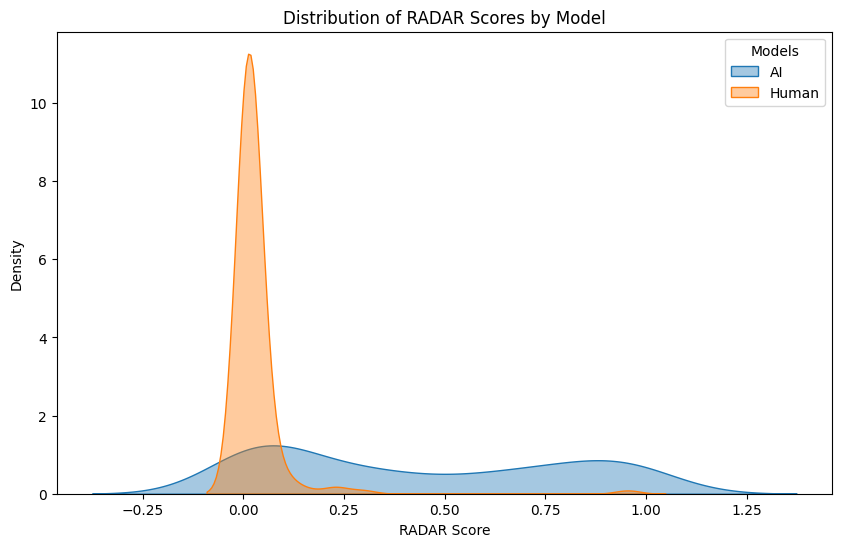

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model_col = "source"
score_col = "radar_score"

models = combined_df[model_col].unique()

# Plot KDE for smooth distributions
plt.figure(figsize=(10, 6))
for model in models:
    subset = combined_df[combined_df[model_col] == model]
    sns.kdeplot(subset[score_col].dropna(), label=model, fill=True, alpha=0.4)  # Fill for better visibility

# Add labels and title
plt.xlabel("RADAR Score")
plt.ylabel("Density")
plt.title("Distribution of RADAR Scores by Model")
plt.legend(title="Models")

# Show plot
plt.show()

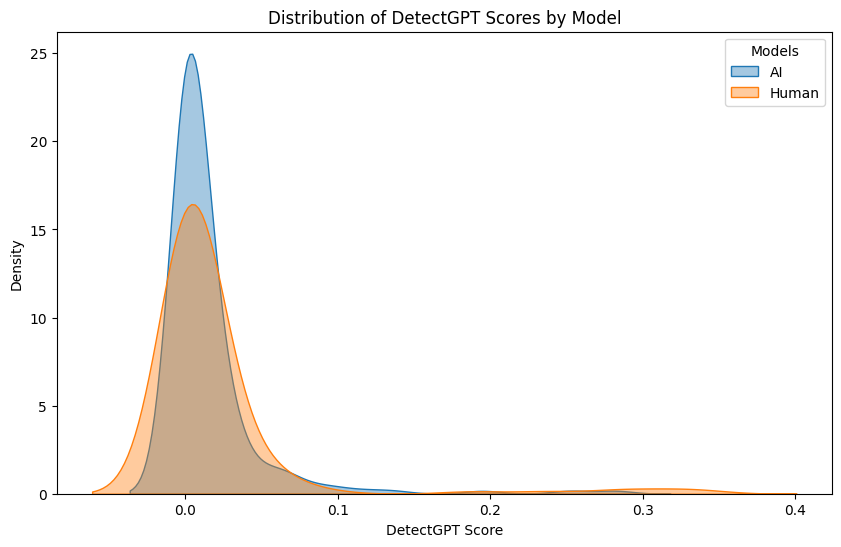

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model_col = "source"
score_col = "detectgpt_score"

models = combined_df[model_col].unique()

# Plot KDE for smooth distributions
plt.figure(figsize=(10, 6))
for model in models:
    subset = combined_df[combined_df[model_col] == model]
    sns.kdeplot(subset[score_col].dropna(), label=model, fill=True, alpha=0.4)  # Fill for better visibility

# Add labels and title
plt.xlabel("DetectGPT Score")
plt.ylabel("Density")
plt.title("Distribution of DetectGPT Scores by Model")
plt.legend(title="Models")

# Show plot
plt.show()

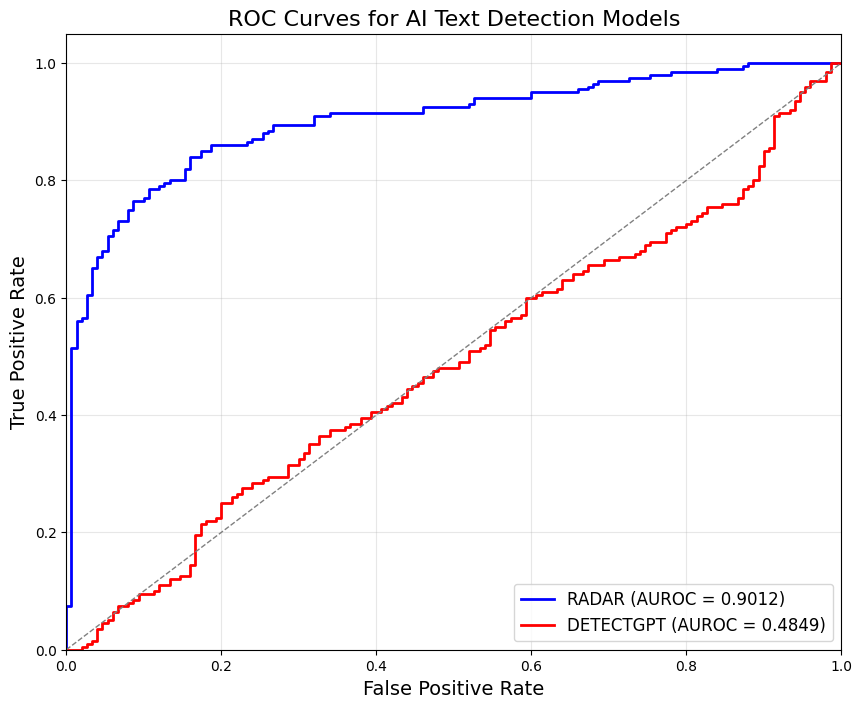

In [ ]:
from sklearn.metrics import roc_curve

# Calculate ROC curve points for both detectors
fpr_radar, tpr_radar, _ = roc_curve(combined_df['label'], combined_df['radar_score'])
fpr_wild, tpr_wild, _ = roc_curve(combined_df['label'], combined_df['detectgpt_score'])

# Create a figure with appropriate size
plt.figure(figsize=(10, 8))

# Plot both ROC curves
plt.plot(fpr_radar, tpr_radar, color='blue', lw=2,
         label=f'RADAR (AUROC = {auroc_radar:.4f})')
plt.plot(fpr_wild, tpr_wild, color='red', lw=2,
         label=f'DETECTGPT (AUROC = {auroc_detectgpt:.4f})')

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Add labels and formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for AI Text Detection Models', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

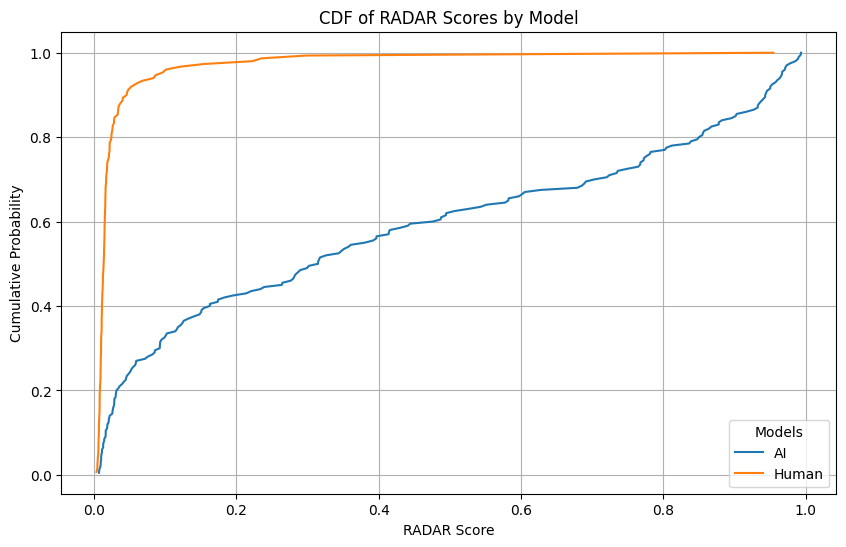

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model_col = "source"
score_col = "radar_score"

models = combined_df[model_col].unique()

plt.figure(figsize=(10, 6))

# Loop through Human and AI separately
for model in models:
    subset = combined_df[combined_df[model_col] == model]
    scores = subset[score_col].dropna()
    sorted_scores = np.sort(scores)
    cdf = np.arange(1, len(sorted_scores)+1) / len(sorted_scores)
    plt.plot(sorted_scores, cdf, label=model)

# Add labels and title
plt.xlabel("RADAR Score")
plt.ylabel("Cumulative Probability")
plt.title("CDF of RADAR Scores by Model")
plt.legend(title="Models")
plt.grid(True)
plt.show()

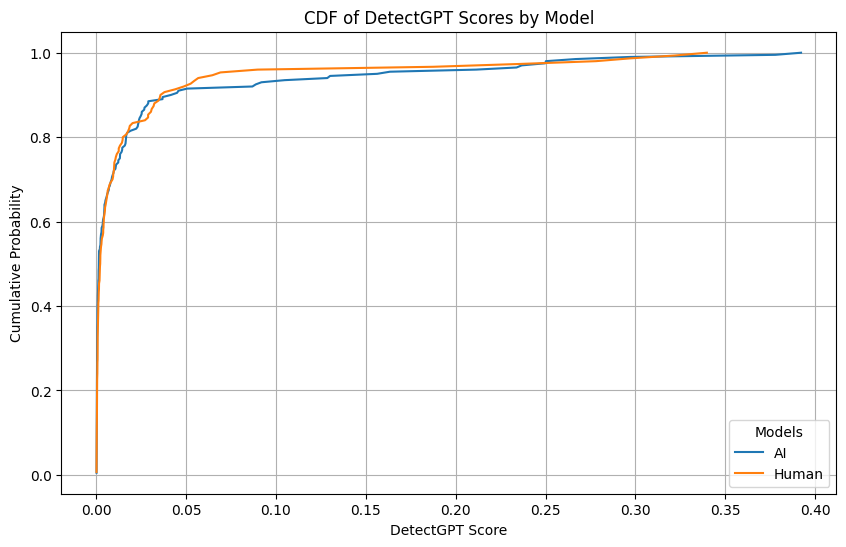

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model_col = "source"
score_col = "detectgpt_score"

models = combined_df[model_col].unique()

plt.figure(figsize=(10, 6))

# Loop through Human and AI separately
for model in models:
    subset = combined_df[combined_df[model_col] == model]
    scores = subset[score_col].dropna()
    sorted_scores = np.sort(scores)
    cdf = np.arange(1, len(sorted_scores)+1) / len(sorted_scores)
    plt.plot(sorted_scores, cdf, label=model)

# Add labels and title
plt.xlabel("DetectGPT Score")
plt.ylabel("Cumulative Probability")
plt.title("CDF of DetectGPT Scores by Model")
plt.legend(title="Models")
plt.grid(True)
plt.show()
